In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
Eikon = pd.read_excel("Eikon_1.xlsx")
Eikon.drop(labels=[0,1], inplace=True)

In [3]:
Eikon.reset_index(inplace=True)
Eikon.head()

,index,Identifier (RIC),Company Name,Business Description,"Turnover\n(2021-12-31, USD)",Revenue (LTM),Market Cap,Beta 5 Year Monthly,"Full-Time Employees (Pvt)\n(2021-12-31, LTM)",Country of Headquarters,...,"Selling/General/Administrative Expense\n(2020-12-31, LTM, USD, Thousands)","Selling/General/Administrative Expense, Total\n(2019-12-31, LTM, USD, Thousands)","Net Sales\n(USD, Thousands)\nIn the last 2 FY",Unnamed: 19,"Total Inventory\n(2021-12-31, LTM, USD, Thousands)","Revenue - Mean\n(2021-12-31, CY1, Thousands, USD)\nMedian of GICS Industry\nOver Current Universe","Online Sales\n(USD, Thousands)\nIn the last 4 FY",Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2,FLWS.OQ,1-800-Flowers.Com Inc,"1-800-Flowers.Com, Inc. is a provider of gifts...",5.142836e+06,2.213634e+09,8.455661e+08,1.675169,NaN,United States of America,...,4.824170e+05,4.122670e+05,2122245,1489637,1.620190e+05,2.791691e+06,2122245,1489637,1248623,1152552
1,3,ADH.AX,Adairs Ltd,"Adairs Limited is an Australia-based company, ...",1.047552e+06,3.570007e+08,3.770343e+08,2.216406,NaN,Australia,...,1.241732e+04,9.458454e+04,379119,266807,5.130149e+04,1.090942e+06,141934,85201,41418,30718.2
2,4,ABY.AX,Adore Beauty Group Ltd,Adore Beauty Group Limited is an Australia-bas...,2.734952e+05,1.415031e+08,1.379753e+08,NaN,NaN,Australia,...,NaN,NaN,134422,83612,1.156421e+04,2.791691e+06,134422,83608.5,51377,39057.7
3,5,BABA.N,Alibaba Group Holding Ltd,Alibaba Group Holding Ltd is a holding company...,3.623535e+08,1.306134e+11,2.814131e+11,0.894881,258578.0,China,...,1.057878e+07,1.026307e+07,1.0948e+08,7.19849e+07,NaN,2.791691e+06,7.7557e+07,5.04283e+07,3.981e+07,3.0414e+07
4,6,AMZN.OQ,Amazon.com Inc,"Amazon.com, Inc. provides a range of products ...",2.290510e+09,4.698220e+11,1.571927e+12,1.129637,1468000.0,United States of America,...,7.552800e+07,6.059400e+07,469822000,386064000,2.567400e+07,2.791691e+06,222075000,197346000,141247000,122987000


In [5]:
Eikon.drop(columns=['index'], inplace=True)

In [6]:
Eikon['Unnamed: 25'].dropna(inplace=True)

In [7]:
Eikon.describe()

,"Turnover\n(2021-12-31, USD)",Revenue (LTM),Market Cap,Beta 5 Year Monthly,"Full-Time Employees (Pvt)\n(2021-12-31, LTM)","Gross Margin, Percent\n(2021-12-31, LTM)","Research And Development\n(2020-12-31, LTM, USD, Thousands)","Selling/General/Administrative Expense\n(2021-12-31, LTM, USD, Thousands)","Selling/General/Administrative Expense\n(2020-12-31, LTM, USD, Thousands)","Selling/General/Administrative Expense, Total\n(2019-12-31, LTM, USD, Thousands)","Total Inventory\n(2021-12-31, LTM, USD, Thousands)","Revenue - Mean\n(2021-12-31, CY1, Thousands, USD)\nMedian of GICS Industry\nOver Current Universe"
count,1.040000e+02,8.600000e+01,1.050000e+02,91.000000,2.400000e+01,104.000000,1.100000e+01,9.800000e+01,9.800000e+01,9.700000e+01,1.040000e+02,1.050000e+02
mean,4.103598e+07,1.283688e+10,2.383391e+10,1.487934,9.787279e+04,0.439456,4.471568e+06,2.406075e+06,1.864018e+06,1.836949e+06,8.967502e+05,3.177133e+06
std,2.282459e+08,5.324966e+10,1.563916e+11,1.020197,3.069216e+05,0.166803,1.213112e+07,1.090000e+07,7.959178e+06,6.577488e+06,2.834154e+06,7.118751e+06
min,1.500000e-02,8.037478e+07,3.859532e+01,-0.326093,9.500000e+01,0.059458,1.256591e+02,1.237721e+03,7.705146e+02,3.879456e+03,1.825182e+03,6.028603e+05
25%,2.615961e+05,4.318471e+08,1.601545e+08,0.878878,1.186062e+03,0.309767,1.017750e+04,1.034590e+05,1.048943e+05,1.265057e+05,5.012457e+04,9.244505e+05
50%,1.779992e+06,1.352798e+09,7.059200e+08,1.388894,4.500000e+03,0.455404,4.949800e+04,3.207289e+05,2.659065e+05,3.338537e+05,1.031107e+05,1.090942e+06
75%,8.957312e+06,6.057653e+09,4.194484e+09,1.995795,2.691262e+04,0.577148,5.442665e+05,1.020140e+06,9.077661e+05,9.663167e+05,5.082509e+05,2.791691e+06
max,2.290510e+09,4.698220e+11,1.571927e+12,7.819322,1.468000e+06,0.772484,4.042900e+07,1.035160e+08,7.552800e+07,6.059400e+07,2.567400e+07,5.804912e+07


In [8]:
X = Eikon.drop(labels=Eikon.columns[-4::], axis=1)
y = Eikon.iloc[:,-1]

In [9]:
X = X[X.columns[X.dtypes != "object"]]

In [10]:
X.isna().sum()
X.fillna(value=0,inplace=True)

In [11]:
Eikon.columns

Index(['Identifier (RIC)', 'Company Name', 'Business Description',
       'Turnover\n(2021-12-31, USD)', 'Revenue (LTM)', 'Market Cap',
       'Beta 5 Year Monthly', 'Full-Time Employees (Pvt)\n(2021-12-31, LTM)',
       'Country of Headquarters', 'Gross Margin, Percent\n(2021-12-31, LTM)',
       'Capital Expenditures - Total (Pvt)\n(USD, Thousands)\nIn the last 2 FY',
       'Unnamed: 11', 'Organization Website',
       'Research And Development\n(2020-12-31, LTM, USD, Thousands)',
       'TRBC Industry Name',
       'Selling/General/Administrative Expense\n(2021-12-31, LTM, USD, Thousands)',
       'Selling/General/Administrative Expense\n(2020-12-31, LTM, USD, Thousands)',
       'Selling/General/Administrative Expense, Total\n(2019-12-31, LTM, USD, Thousands)',
       'Net Sales\n(USD, Thousands)\nIn the last 2 FY', 'Unnamed: 19',
       'Total Inventory\n(2021-12-31, LTM, USD, Thousands)',
       'Revenue - Mean\n(2021-12-31, CY1, Thousands, USD)\nMedian of GICS Industry\nOver Cu

In [12]:
Eikon.drop(columns=['Full-Time Employees (Pvt)\n(2021-12-31, LTM)','Research And Development\n(2020-12-31, LTM, USD, Thousands)'],inplace=True)

In [13]:
clf = LinearRegression().fit(X, y.fillna(value=0))


In [14]:
clf.score(X, y.fillna(value=0))

0.9921888700937439

In [15]:
clf.coef_

array([ 7.31242973e-03,  2.39040373e-04, -5.47242405e-05,  5.18504903e+04,
       -5.68642428e+01, -2.10187385e+05,  4.24279001e+00, -8.38278069e-01,
        1.14778427e+00,  1.88971698e-01, -7.74988468e-01,  1.76500411e-01])

In [2]:
Spark = pd.read_excel("e-comm.xlsx",sheet_name="Data for regression")

In [3]:
Spark.tail(20)

,#,Stocks,ИНН,Вид деятельности,Category,"Online-sales, 2020, mRUB",Growth of online-sales,"Orders, thou",Growth of orders,Average price of orders,...,com_exp_20,com_exp_21,man_exp_18,man_exp_19,man_exp_20,man_exp_21,EBT_18,EBT_19,EBT_20,EBT_21
88,89.0,okeydostavka.ru,7.826088e+09,Торговля розничная преимущественно пищевыми пр...,FMCG,2850.0,0.24,760.0,0.27,3750.0,...,3.018862e+10,3.173793e+10,2.576399e+09,2.458076e+09,2.337487e+09,2.564517e+09,449629000.0,396643000.0,556667000.0,1.272628e+09
89,90.0,vsemayki.ru,5.406807e+09,Торговля розничная по почте или по информацион...,подарки,2820.0,0.21,1220.0,0.06,2310.0,...,1.574400e+07,2.480150e+08,0.000000e+00,0.000000e+00,8.841000e+06,0.000000e+00,0.0,0.0,-12359000.0,-9.088000e+07
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Spark = Spark.iloc[0:90,:]

<AxesSubplot:>

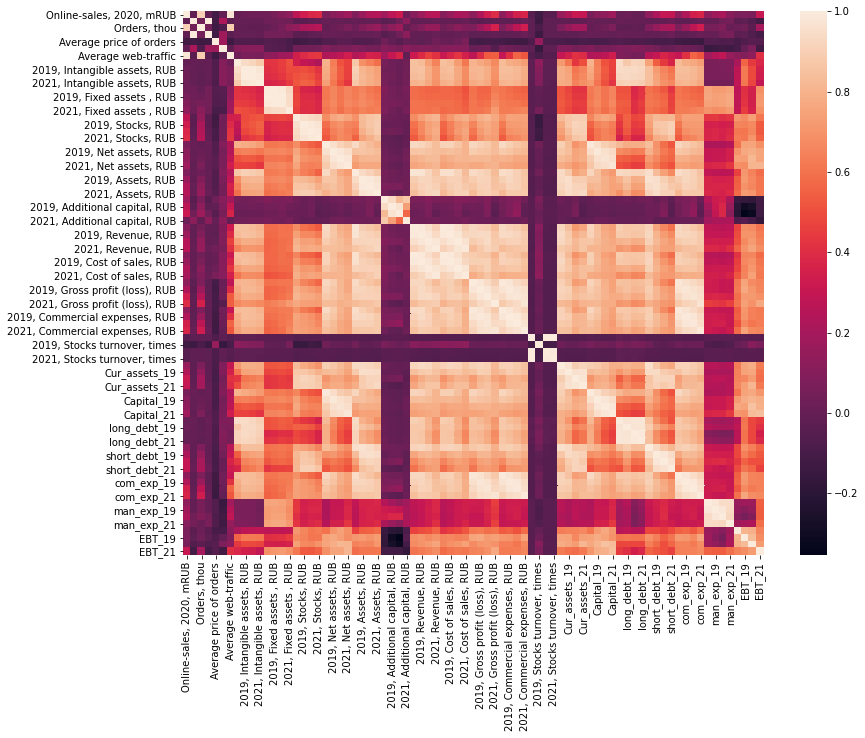

In [5]:
ax, f = plt.subplots(figsize=(13,10))
sns.heatmap(Spark.iloc[:,5::].corr())

In [6]:
X = pd.concat([pd.get_dummies(Spark['Category']),Spark.iloc[:,5::]],axis=1)

In [7]:
X.head()

,FMCG,автотовары,дом и ремонт,здоровье,книги и диски,косметика,"одежда, обувь и аксессуары",офис и бизнес,подарки,спорт и активный отдых,...,com_exp_20,com_exp_21,man_exp_18,man_exp_19,man_exp_20,man_exp_21,EBT_18,EBT_19,EBT_20,EBT_21
0,0,0,0,0,0,0,0,0,0,0,...,5.647898e+10,9.144252e+10,4.718270e+08,1.797980e+08,2.368580e+08,3.214110e+08,2.422579e+09,6.567635e+09,2.573836e+09,1.720133e+10
1,0,0,0,0,0,0,0,0,0,0,...,4.219144e+10,0.000000e+00,7.707640e+08,2.973886e+09,5.677871e+09,0.000000e+00,-5.655114e+09,-1.808184e+10,-1.717521e+10,0.000000e+00
2,0,0,0,0,0,0,0,0,0,0,...,8.183340e+09,1.969843e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.373021e+09,6.636930e+08,1.749654e+09,2.600317e+09
3,0,0,0,0,0,0,0,0,0,0,...,4.803491e+10,6.485672e+10,2.115399e+09,3.146269e+09,3.840381e+09,5.362245e+09,1.319536e+10,1.165390e+10,3.852097e+10,3.017573e+10
4,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,9.534400e+07,9.006800e+07,1.296060e+08,2.689580e+08,1.643330e+08,1.386305e+10,4.980565e+09,1.100822e+10


In [8]:
X.columns

Index(['FMCG', 'автотовары', 'дом и ремонт', 'здоровье', 'книги и диски',
       'косметика', 'одежда, обувь и аксессуары', 'офис и бизнес', 'подарки',
       'спорт и активный отдых', 'товары для детей', 'универсальные магазины',
       'электроника и техника', 'Online-sales, 2020, mRUB',
       'Growth of online-sales', 'Orders, thou', 'Growth of orders',
       'Average price of orders', 'Growth of average price of orders',
       'Average web-traffic', '2018, Intangible assets, RUB',
       '2019, Intangible assets, RUB', '2020, Intangible assets, RUB',
       '2021, Intangible assets, RUB', '2018, Fixed assets , RUB',
       '2019, Fixed assets , RUB', '2020, Fixed assets , RUB',
       '2021, Fixed assets , RUB', '2018, Stocks, RUB', '2019, Stocks, RUB',
       '2020, Stocks, RUB', '2021, Stocks, RUB', '2018, Net assets, RUB',
       '2019, Net assets, RUB', '2020, Net assets, RUB',
       '2021, Net assets, RUB', '2018, Assets, RUB', '2019, Assets, RUB',
       '2020, Assets, RU

<AxesSubplot:>

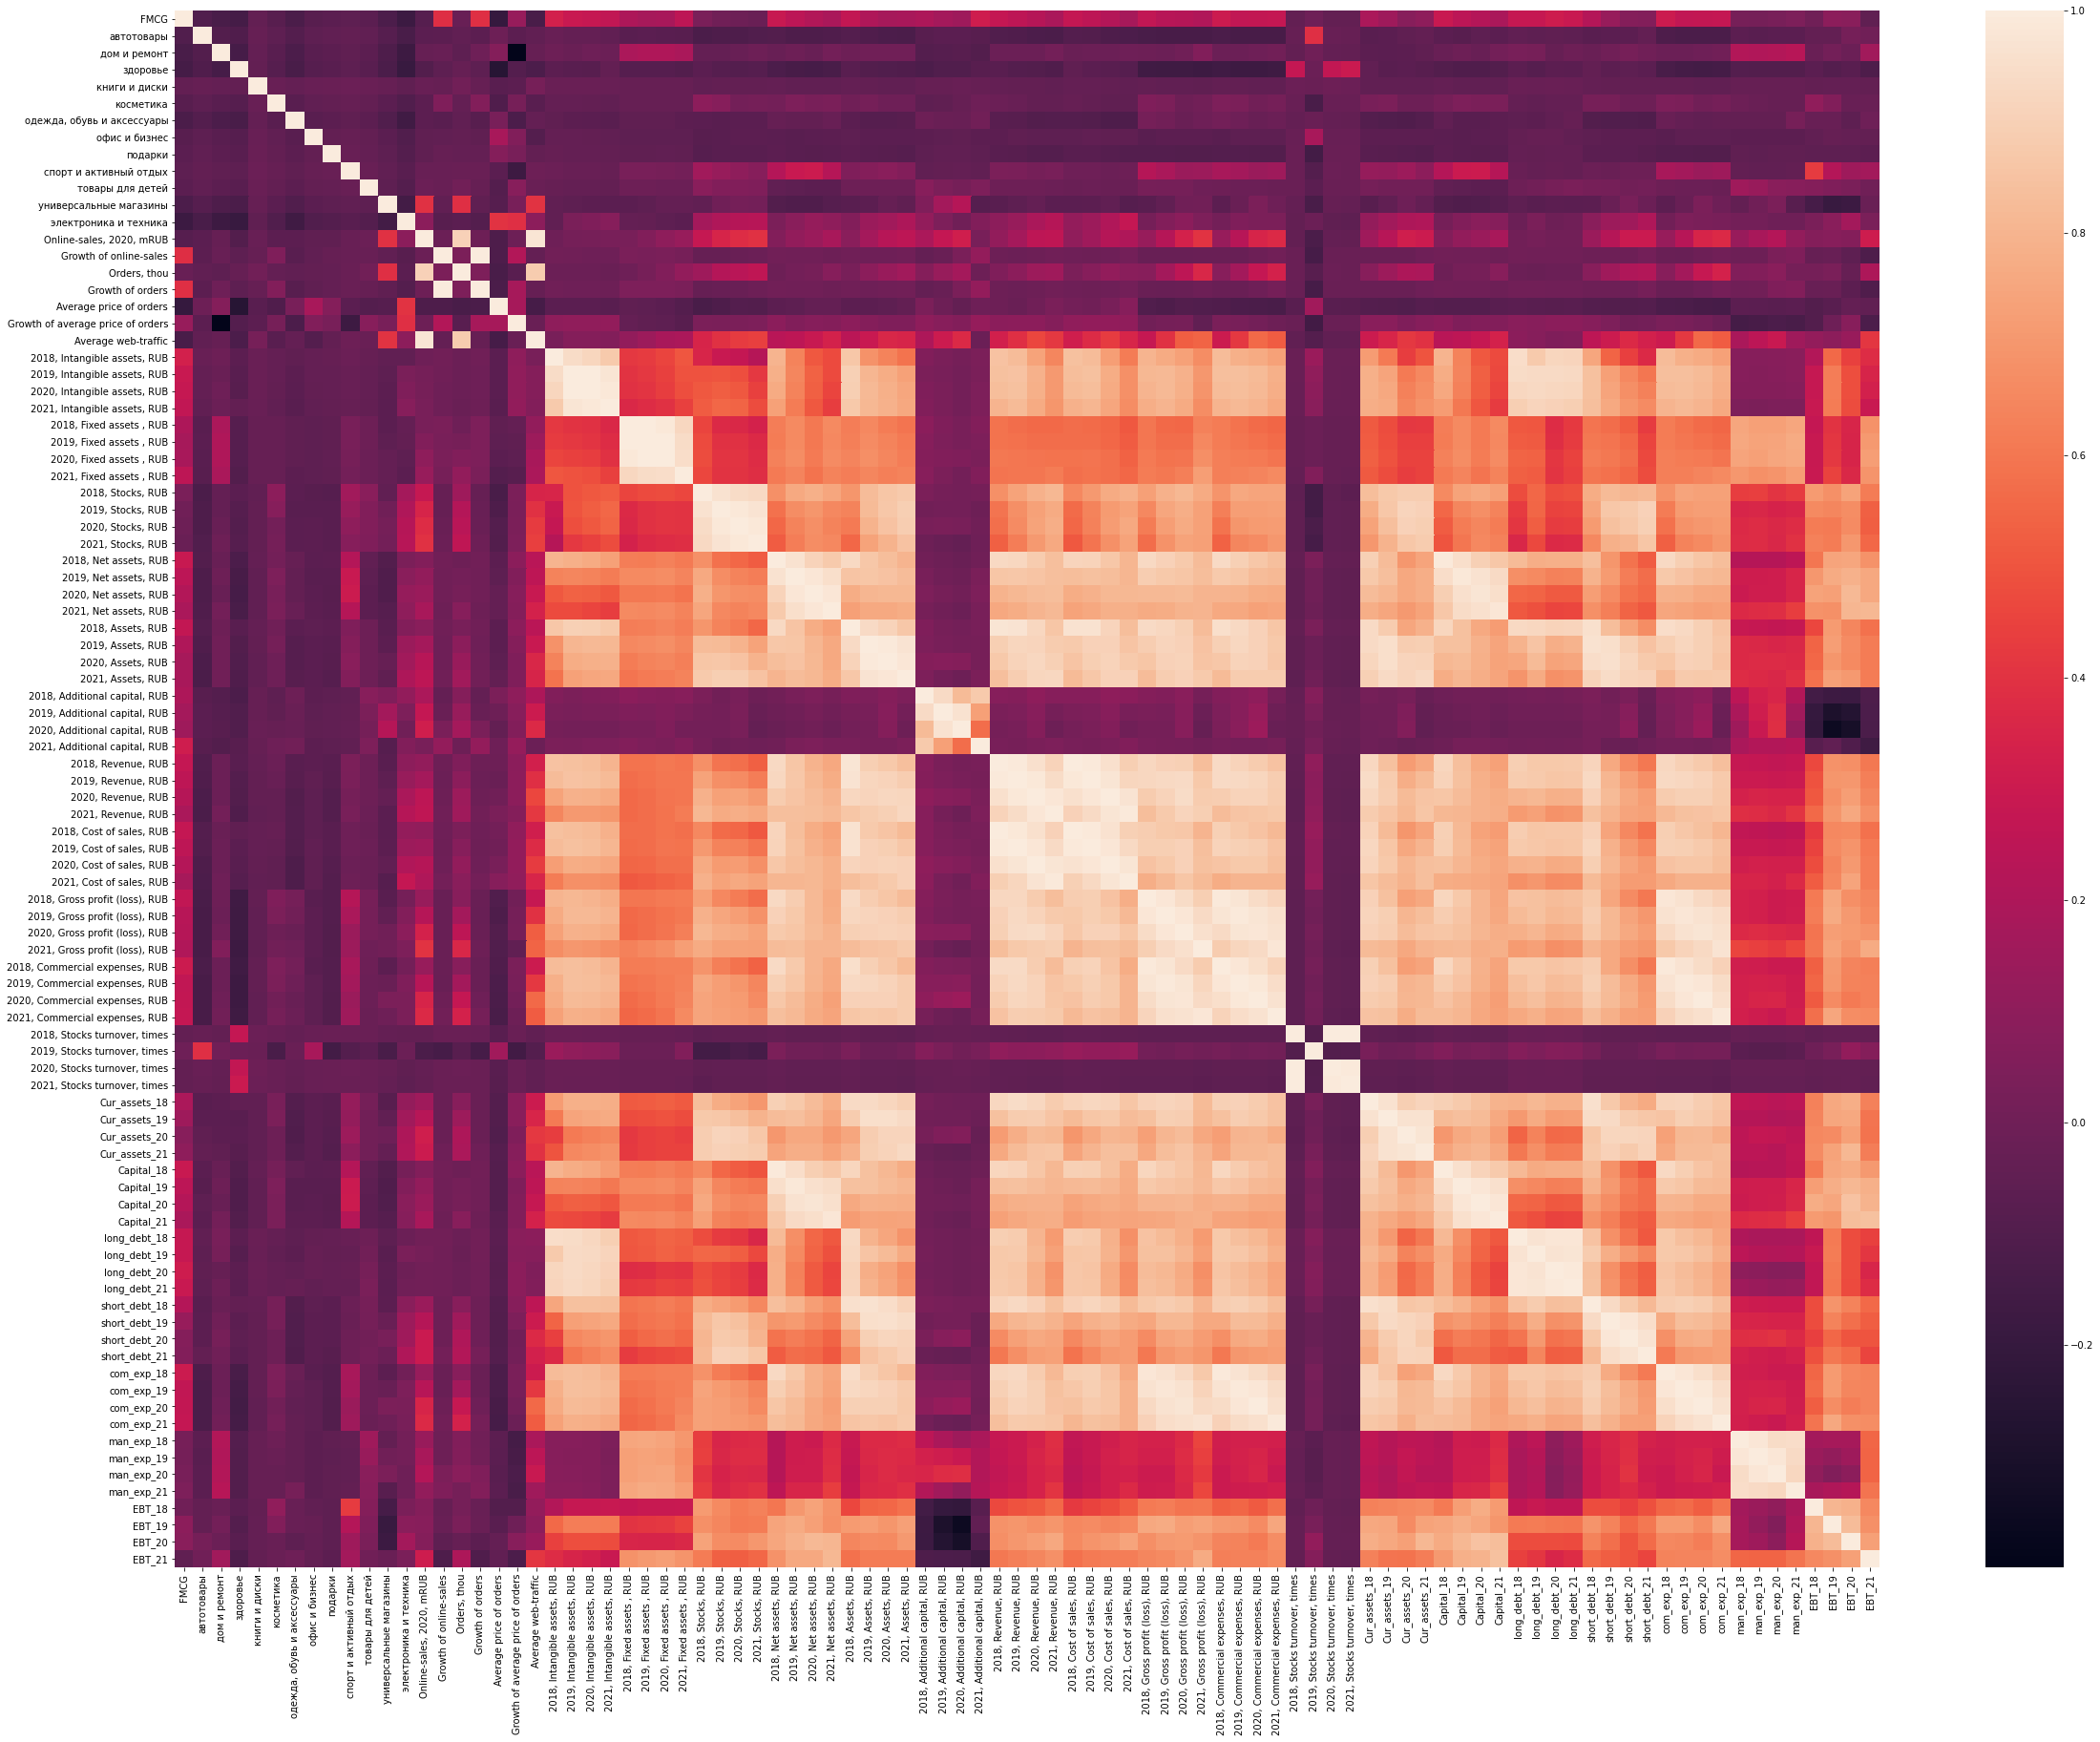

In [9]:
ax, f = plt.subplots(figsize=(40,30))
sns.heatmap(X.corr())

In [10]:
X.iloc[:,0:13].sum()

FMCG                          11
автотовары                     6
дом и ремонт                  10
здоровье                      12
книги и диски                  1
косметика                      4
одежда, обувь и аксессуары     9
офис и бизнес                  4
подарки                        3
спорт и активный отдых         2
товары для детей               3
универсальные магазины         8
электроника и техника         17
dtype: int64

In [11]:
X[['Average web-traffic', 'Online-sales, 2020, mRUB']].corr()

,Average web-traffic,"Online-sales, 2020, mRUB"
Average web-traffic,1.000000,0.974204
"Online-sales, 2020, mRUB",0.974204,1.000000


In [12]:
from scipy import stats

<AxesSubplot:>

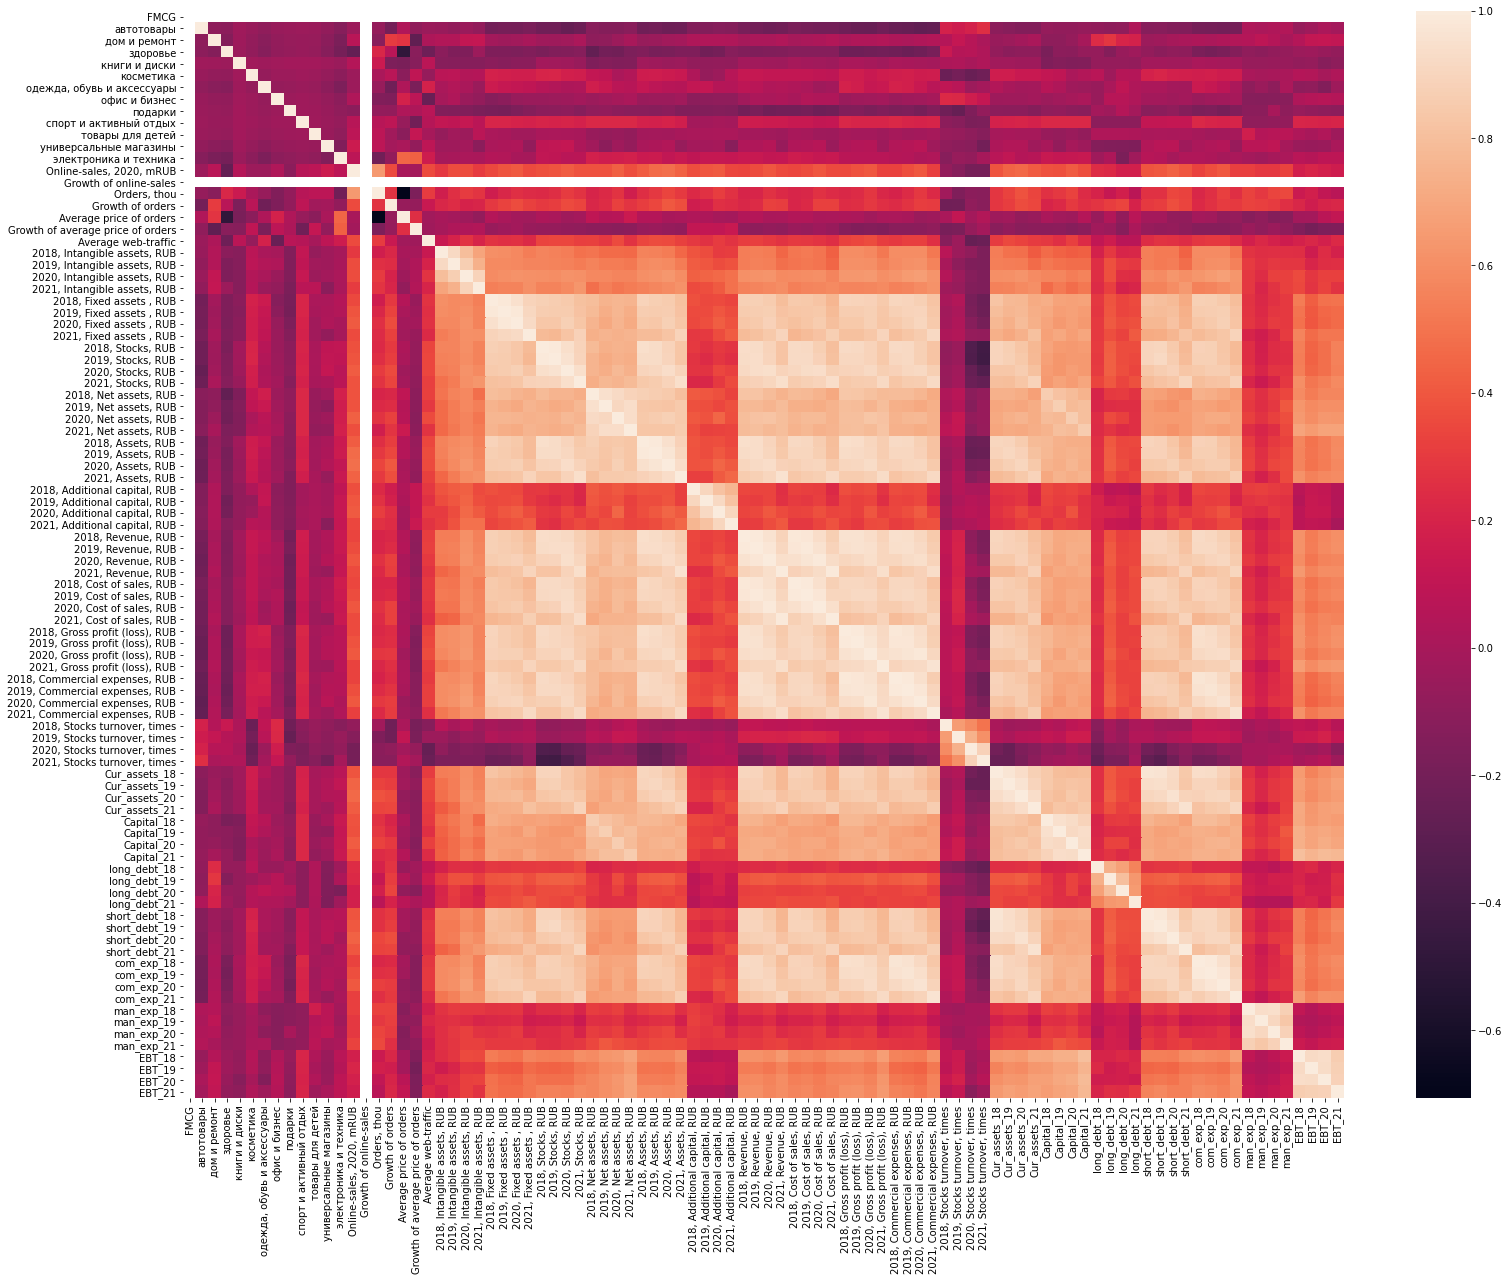

In [13]:
rho, pval = stats.spearmanr(X)
ax, f = plt.subplots(figsize=(26,20))
sns.heatmap(rho, xticklabels=X.columns, yticklabels=X.columns)

<AxesSubplot:>

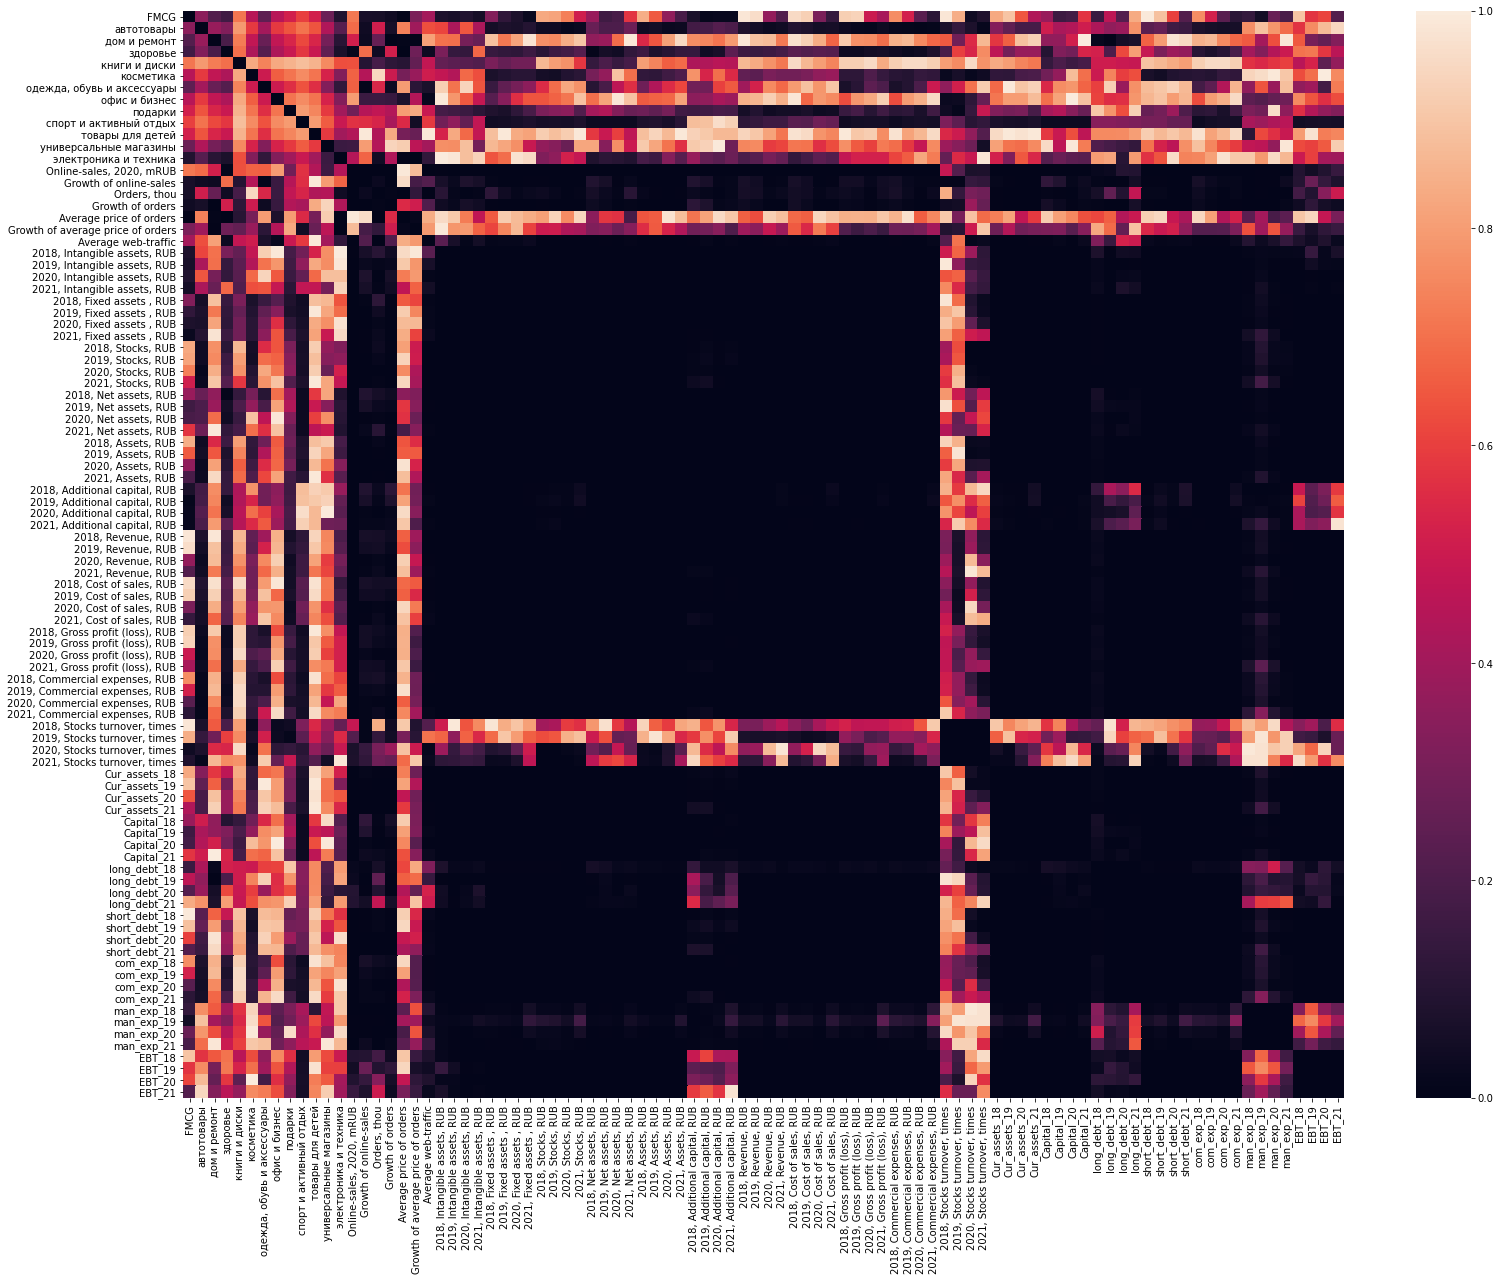

In [14]:
ax, f = plt.subplots(figsize=(26,20))
sns.heatmap(pval, xticklabels=X.columns, yticklabels=X.columns)

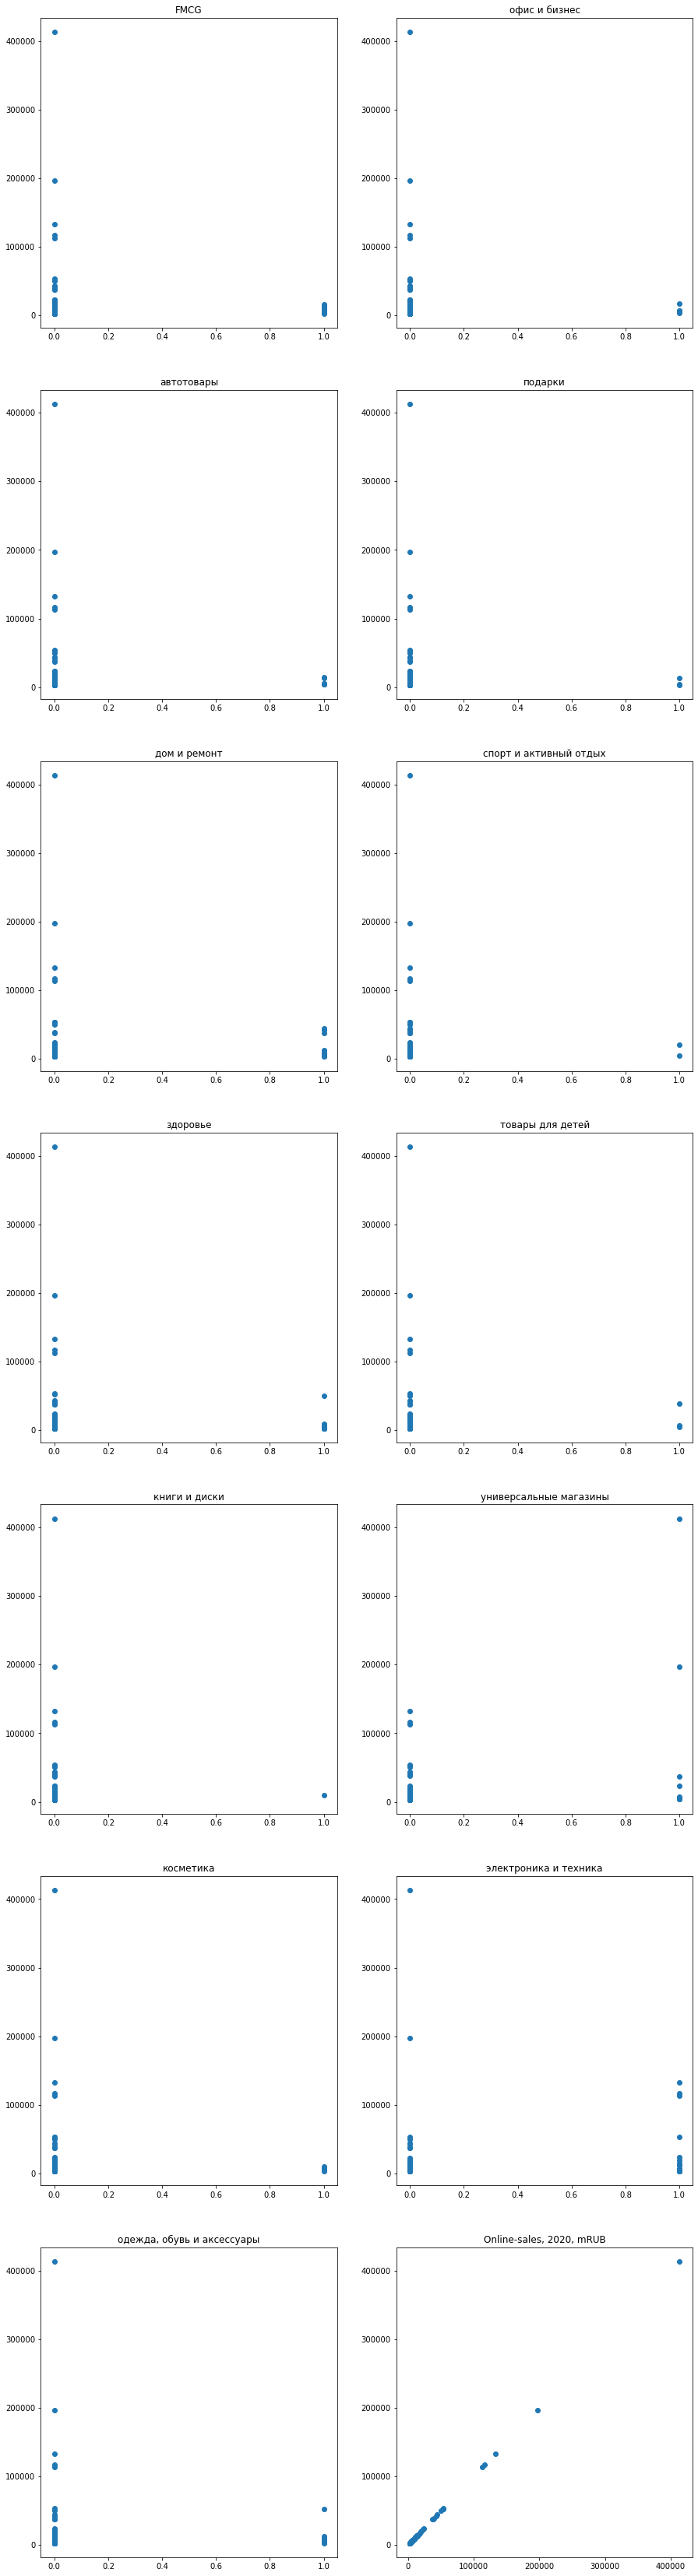

In [15]:
f, axes = plt.subplots(7,2,figsize=(15,60))
for column in list(np.arange(0,7)):
    axes[column,0].scatter(X.iloc[:,column], X['Online-sales, 2020, mRUB'])
    axes[column,0].set_title(X.columns[column])
for column in list(np.arange(0,7)):
    axes[column,1].scatter(X.iloc[:,7+column], X['Online-sales, 2020, mRUB'])
    axes[column,1].set_title(X.columns[7+column])
    
plt.show()

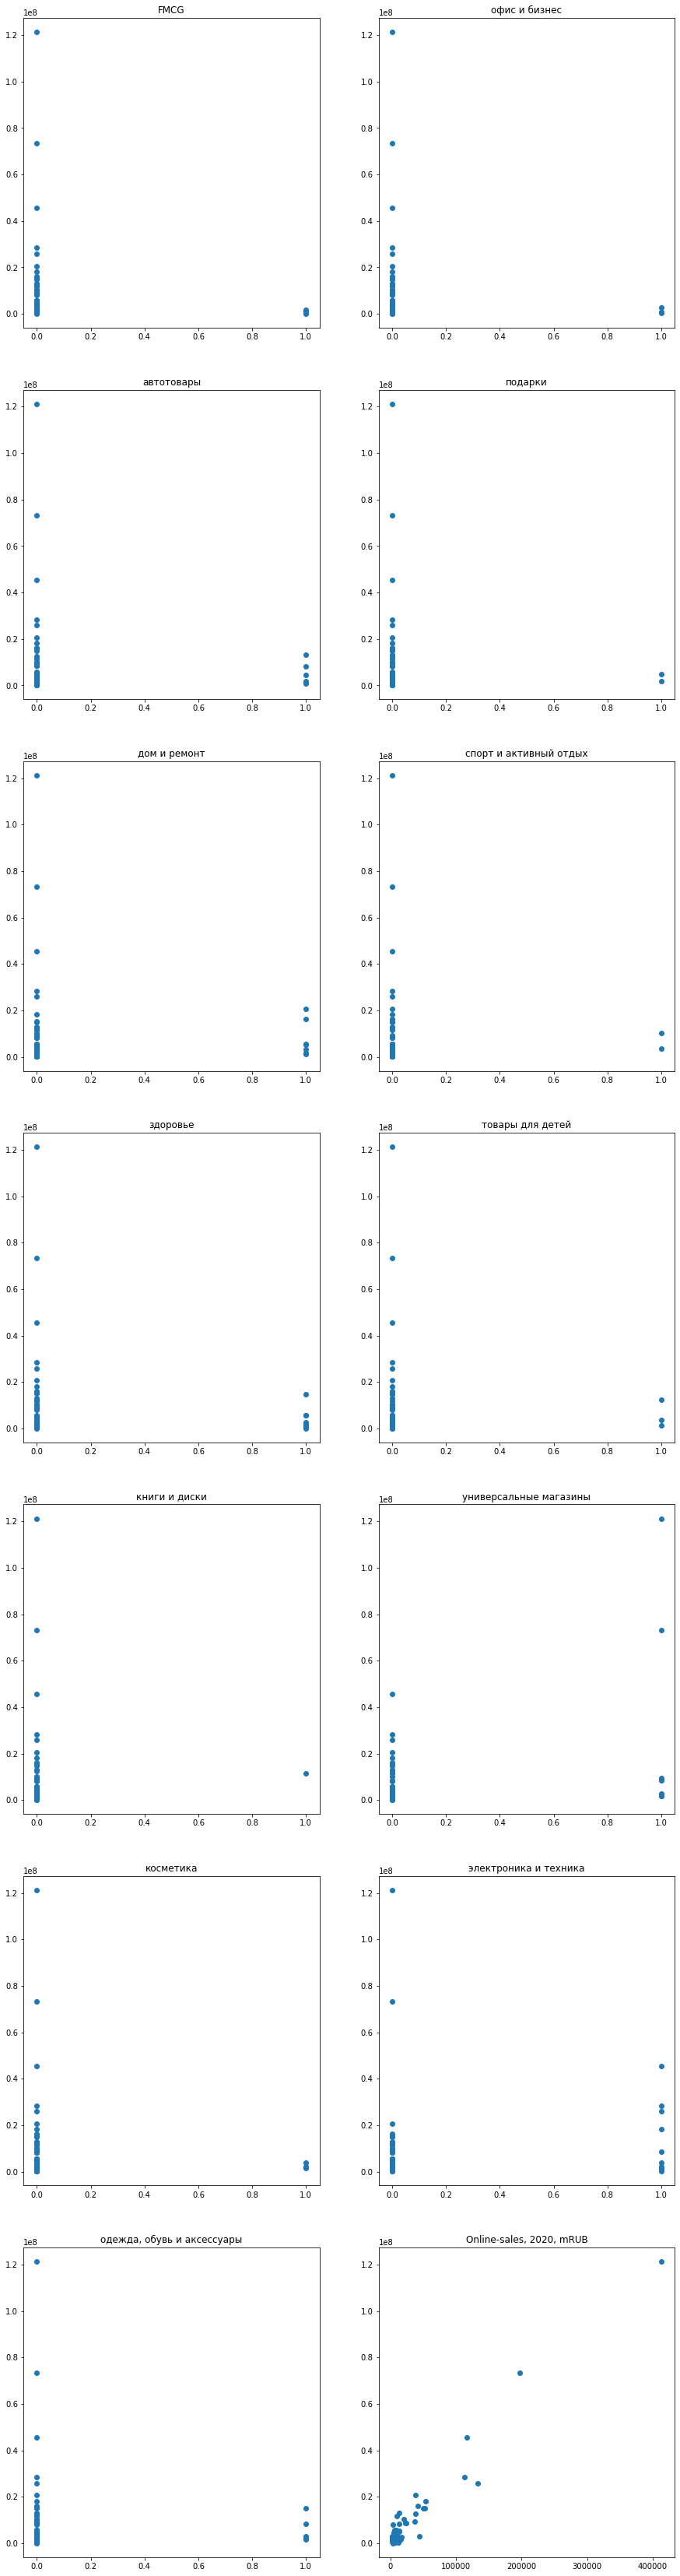

In [16]:
f, axes = plt.subplots(7,2,figsize=(15,60))
for column in list(np.arange(0,7)):
    axes[column,0].scatter(X.iloc[:,column], X['Average web-traffic'])
    axes[column,0].set_title(X.columns[column])
for column in list(np.arange(0,7)):
    axes[column,1].scatter(X.iloc[:,7+column], X['Average web-traffic'])
    axes[column,1].set_title(X.columns[7+column])
plt.show()

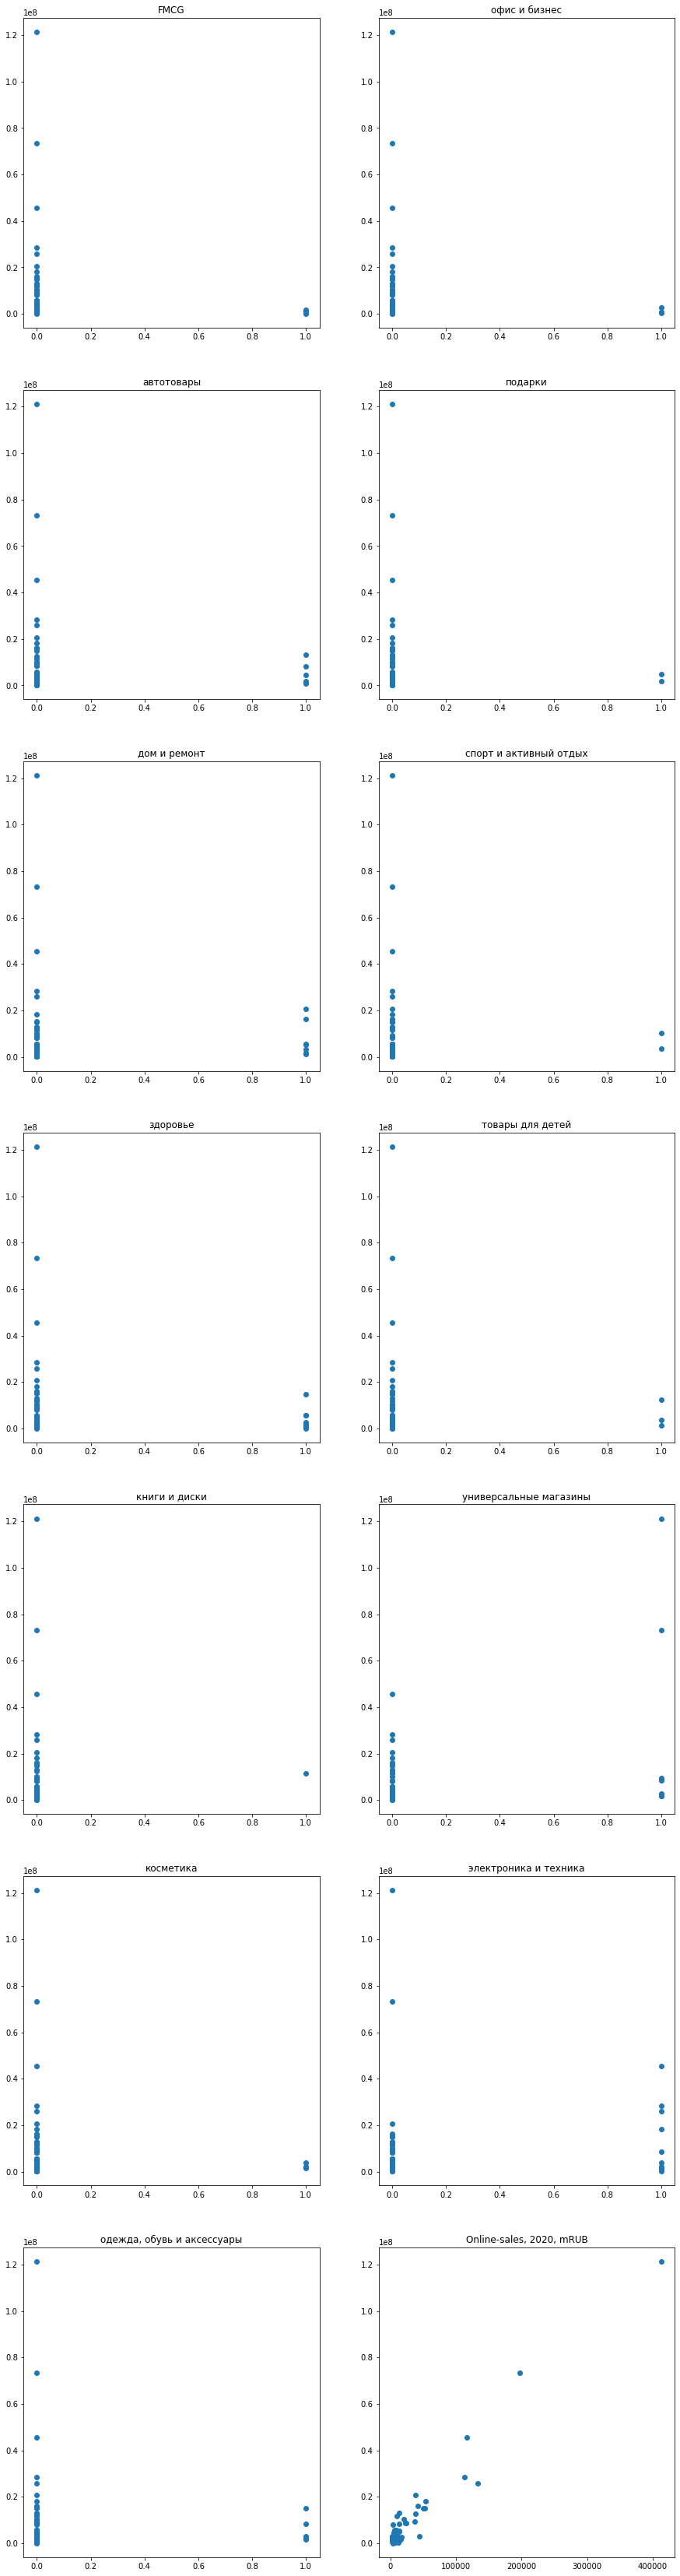

In [17]:
f, axes = plt.subplots(7,2,figsize=(15,60))
for column in list(np.arange(0,7)):
    axes[column,0].scatter(X.iloc[:,column], X['Average web-traffic'])
    axes[column,0].set_title(X.columns[column])
for column in list(np.arange(0,7)):
    axes[column,1].scatter(X.iloc[:,7+column], X['Average web-traffic'])
    axes[column,1].set_title(X.columns[7+column])
plt.show()

In [18]:
clf = LinearRegression().fit(X.dropna().drop(columns=['Average web-traffic']), X.dropna()['Average web-traffic'])


In [19]:
X.columns

Index(['FMCG', 'автотовары', 'дом и ремонт', 'здоровье', 'книги и диски',
       'косметика', 'одежда, обувь и аксессуары', 'офис и бизнес', 'подарки',
       'спорт и активный отдых', 'товары для детей', 'универсальные магазины',
       'электроника и техника', 'Online-sales, 2020, mRUB',
       'Growth of online-sales', 'Orders, thou', 'Growth of orders',
       'Average price of orders', 'Growth of average price of orders',
       'Average web-traffic', '2018, Intangible assets, RUB',
       '2019, Intangible assets, RUB', '2020, Intangible assets, RUB',
       '2021, Intangible assets, RUB', '2018, Fixed assets , RUB',
       '2019, Fixed assets , RUB', '2020, Fixed assets , RUB',
       '2021, Fixed assets , RUB', '2018, Stocks, RUB', '2019, Stocks, RUB',
       '2020, Stocks, RUB', '2021, Stocks, RUB', '2018, Net assets, RUB',
       '2019, Net assets, RUB', '2020, Net assets, RUB',
       '2021, Net assets, RUB', '2018, Assets, RUB', '2019, Assets, RUB',
       '2020, Assets, RU

In [20]:
train = X.rename(columns={'автотовары':'is_auto', 'дом и ремонт':'is_house', 'здоровье':'is_health', 'книги и диски':'is_books',
       'косметика':'is_beauty', 'одежда, обувь и аксессуары':'is_cloth', 'офис и бизнес':'is_office', 'подарки':'is_gifts',
       'спорт и активный отдых':'is_sport', 'товары для детей':'is_child', 'универсальные магазины':'is_uni',
       'электроника и техника':'is_tech', 'Online-sales, 2020, mRUB':'esales_20',
       'Growth of online-sales':'delta_esales_20', 'Orders, thou':'orders', 'Growth of orders':'delta_orders',
       'Average price of orders':'av_price', 'Growth of average price of orders':'delta_av_price',
       'Average web-traffic':'traffic', '2018, Intangible assets, RUB':'INT_18',
       '2019, Intangible assets, RUB':'INT_19', '2020, Intangible assets, RUB':'INT_20',
       '2021, Intangible assets, RUB':'INT_21', '2018, Fixed assets , RUB':'FA_18',
       '2019, Fixed assets , RUB':'FA_19', '2020, Fixed assets , RUB':'FA_20',
       '2021, Fixed assets , RUB':'FA_21', '2018, Stocks, RUB':'Stocks_18', '2019, Stocks, RUB':'Stocks_19',
       '2020, Stocks, RUB':'Stocks_20', '2021, Stocks, RUB':'Stocks_21', '2018, Net assets, RUB':'NA_18',
       '2019, Net assets, RUB':'NA_19', '2020, Net assets, RUB':'NA_20',
       '2021, Net assets, RUB':'NA_21', '2018, Assets, RUB':'Assets_18', '2019, Assets, RUB':'Assets_19',
       '2020, Assets, RUB':'Assets_20', '2021, Assets, RUB':'Assets_21',
       '2018, Additional capital, RUB':'AdCap_18', '2019, Additional capital, RUB':'AdCap_19',
       '2020, Additional capital, RUB':'AdCap_20', '2021, Additional capital, RUB':'AdCap_21',
       '2018, Revenue, RUB':'Rev_18', '2019, Revenue, RUB':'Rev_19', '2020, Revenue, RUB':'Rev_20',
       '2021, Revenue, RUB':'Rev_21', '2018, Cost of sales, RUB':'CoS_18',
       '2019, Cost of sales, RUB':'CoS_19', '2020, Cost of sales, RUB':'CoS_20',
       '2021, Cost of sales, RUB':'CoS_21', '2018, Gross profit (loss), RUB':'Gross_18',
       '2019, Gross profit (loss), RUB':'Gross_19', '2020, Gross profit (loss), RUB':'Gross_20',
       '2021, Gross profit (loss), RUB':'Gross_21', '2018, Commercial expenses, RUB':'ComExp_18',
       '2019, Commercial expenses, RUB':'ComExp_19', '2020, Commercial expenses, RUB':'ComExp_20',
       '2021, Commercial expenses, RUB':'ComExp_21', '2018, Stocks turnover, times':'Turn_18',
       '2019, Stocks turnover, times':'Turn_19', '2020, Stocks turnover, times':'Turn_20',
       '2021, Stocks turnover, times':'Turn_21'})

In [21]:
train.set_index(Spark['ИНН'], inplace=True)

In [22]:
traffic_sp = []
for column in range(len(train.columns)): 
    rho1, pval1 = stats.spearmanr(train.dropna().iloc[:,[column,train.columns.get_loc('traffic')]])
    traffic_sp.append([rho1,pval1])

In [23]:
traffic_sp = pd.DataFrame(data=traffic_sp, index=train.columns, columns=['rho','pval'])

<AxesSubplot:>

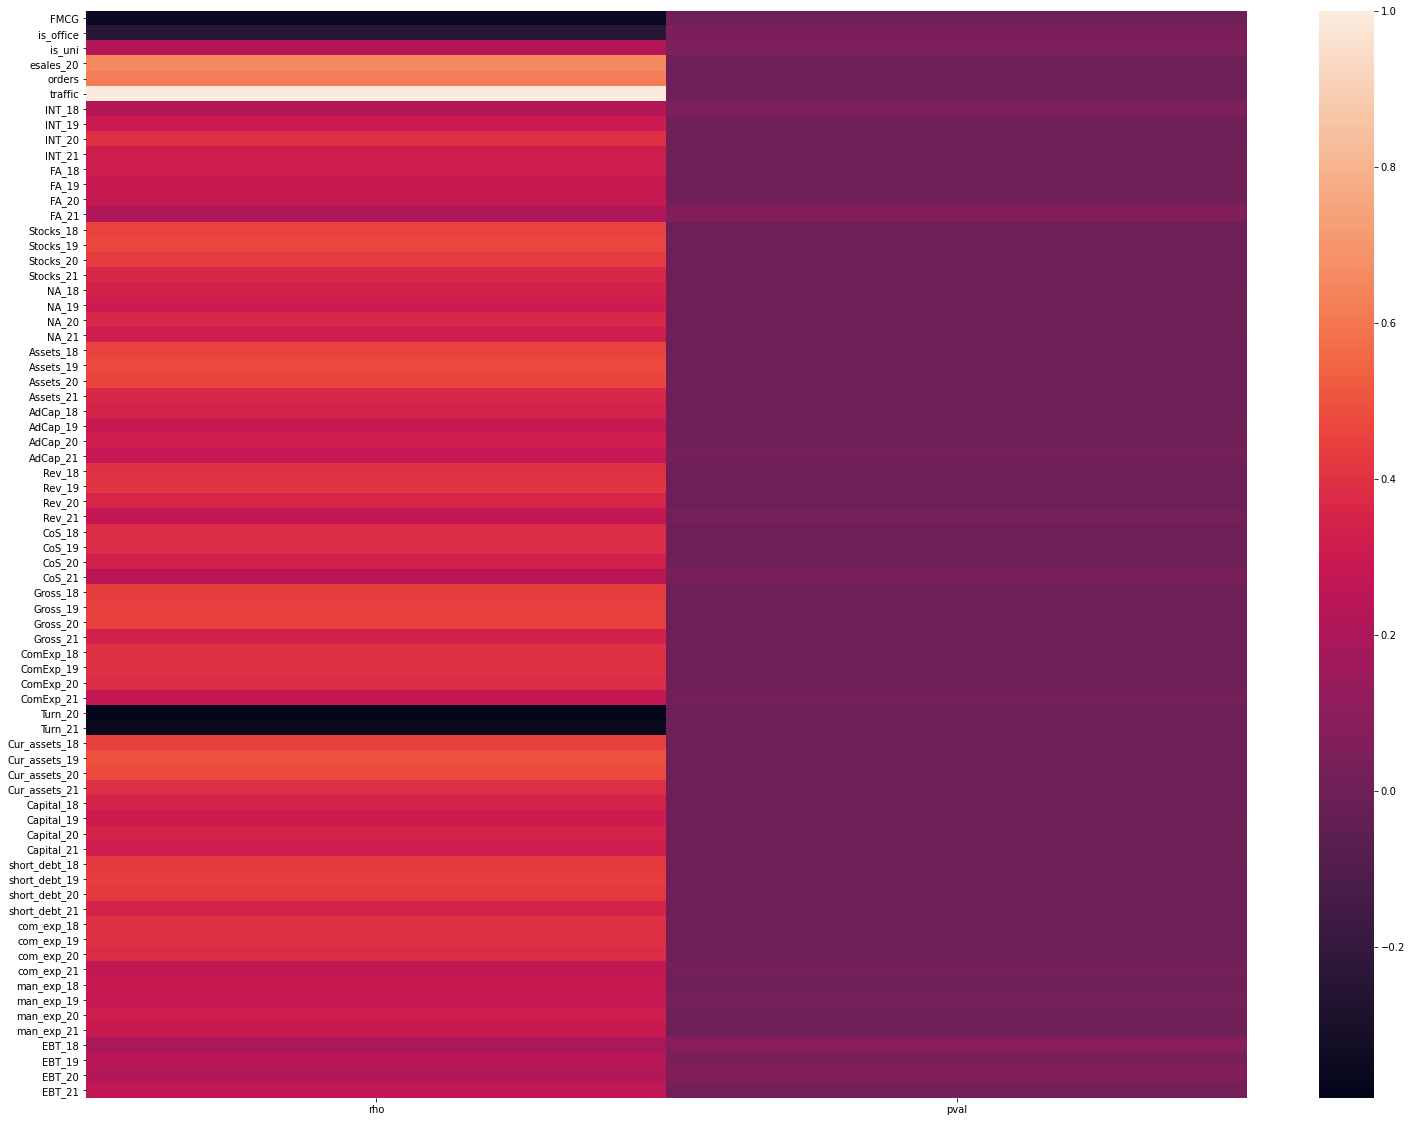

In [24]:
ax, f = plt.subplots(figsize=(26,20))
sns.heatmap(traffic_sp[traffic_sp['pval']<=0.1])


In [25]:
traffic_sp[traffic_sp['pval']<=0.1].sort_values(by='rho',ascending=True)

,rho,pval
Turn_20,-0.393960,4.297916e-04
Turn_21,-0.353730,1.720592e-03
FMCG,-0.351569,1.844613e-03
is_office,-0.236375,3.980707e-02
EBT_18,0.199290,8.435830e-02
...,...,...
Cur_assets_20,0.475844,1.396955e-05
Cur_assets_19,0.497170,4.909036e-06
orders,0.621205,2.132541e-09
esales_20,0.656331,1.222082e-10


C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr

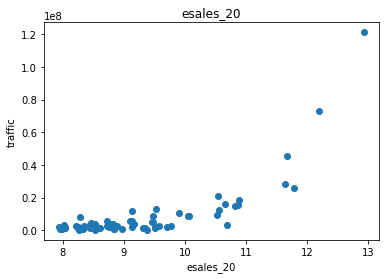

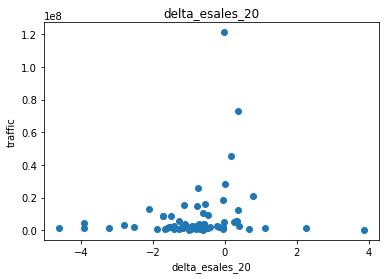

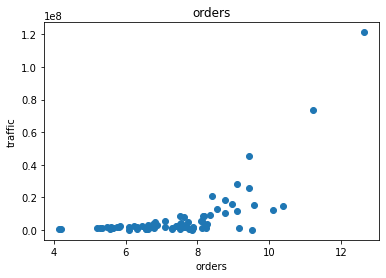

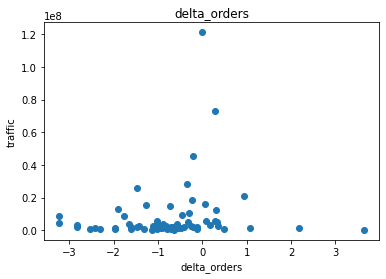

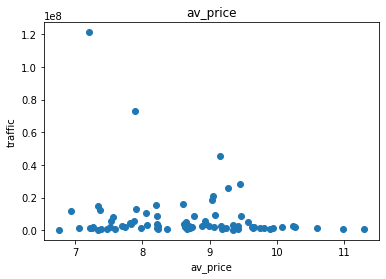

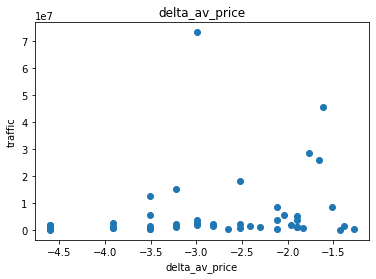

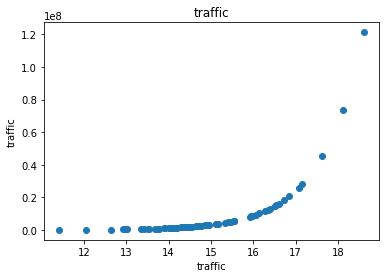

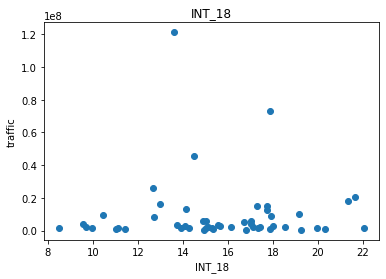

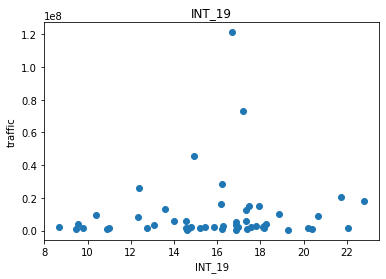

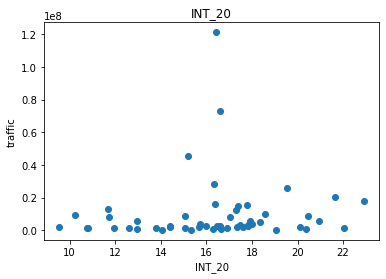

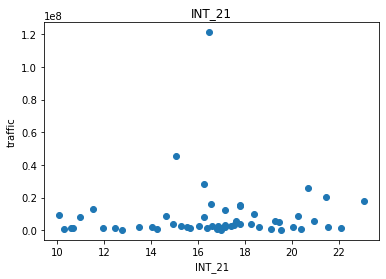

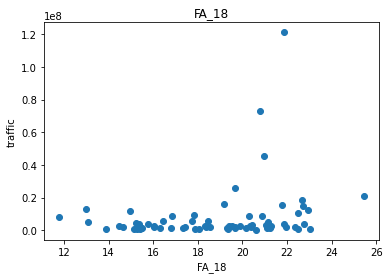

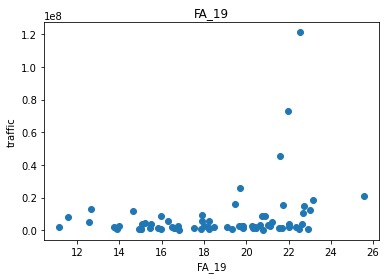

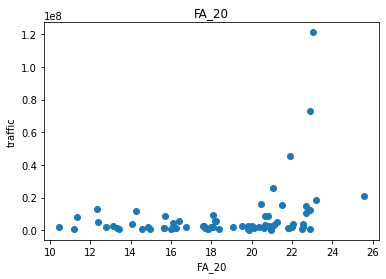

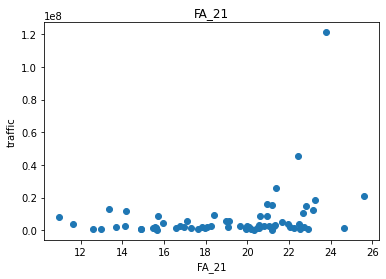

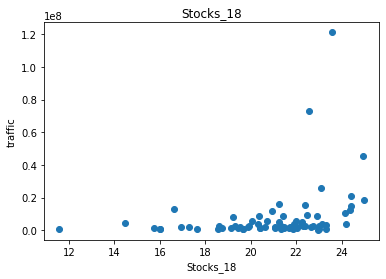

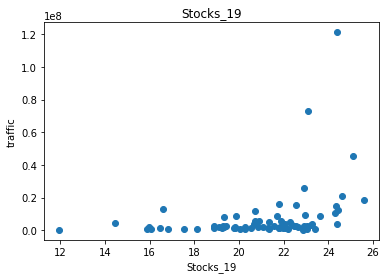

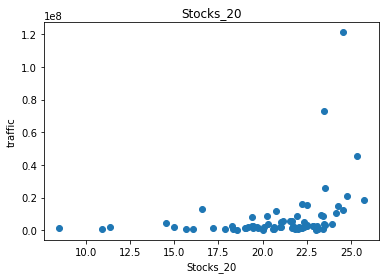

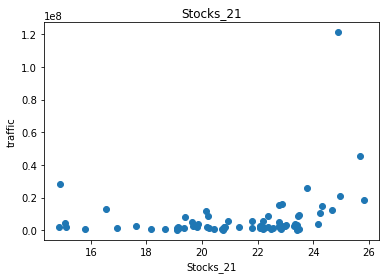

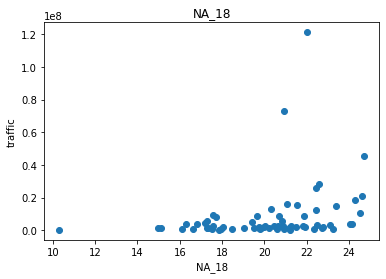

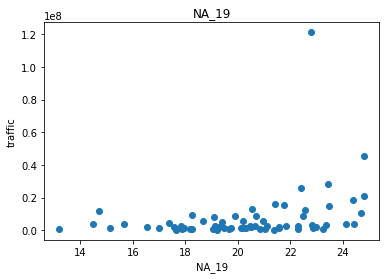

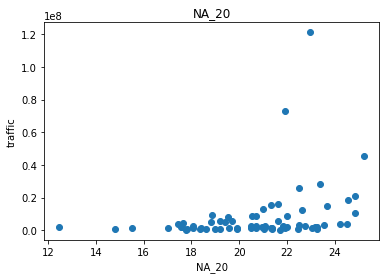

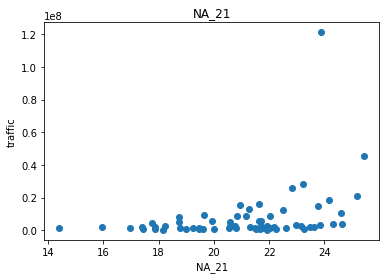

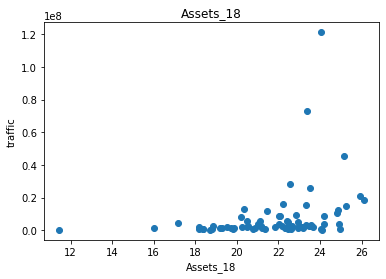

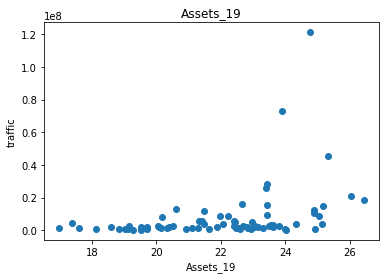

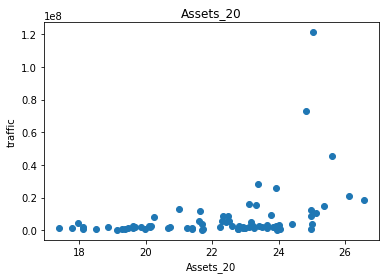

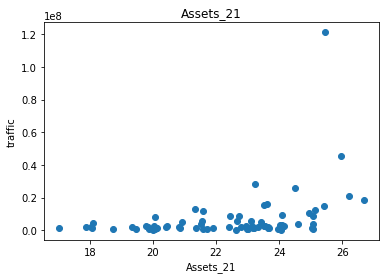

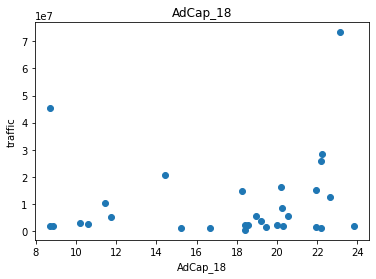

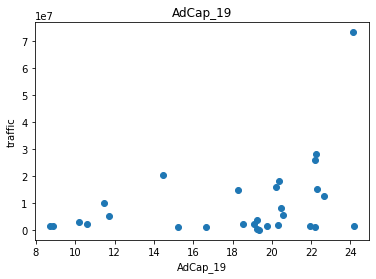

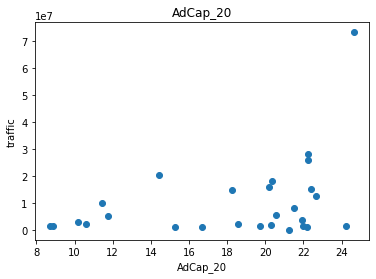

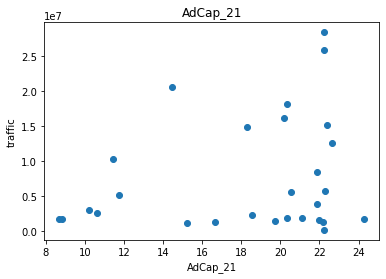

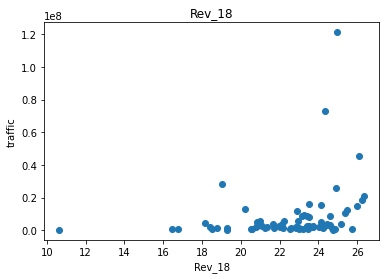

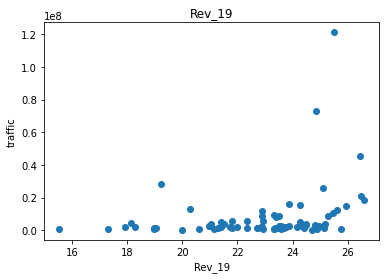

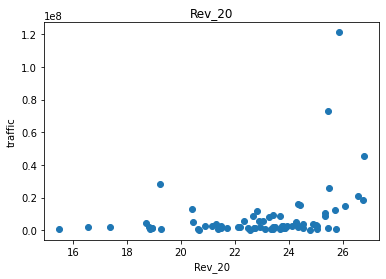

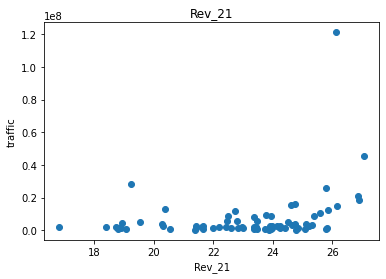

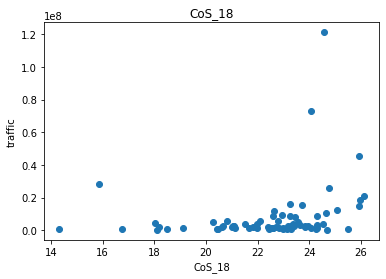

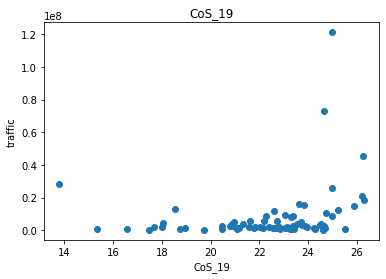

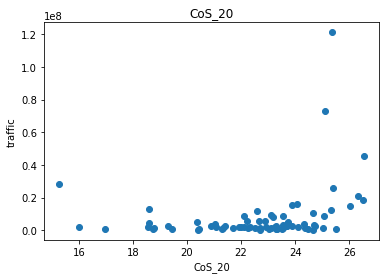

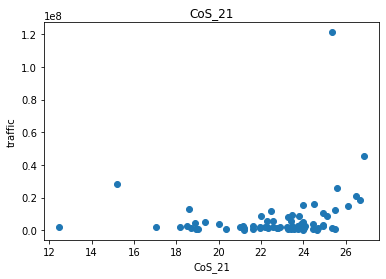

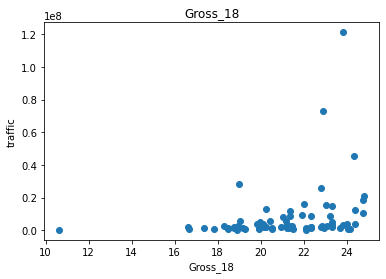

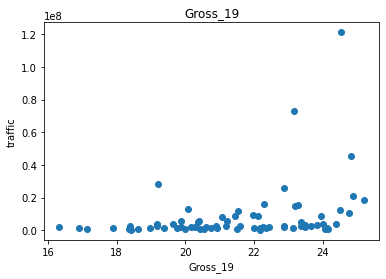

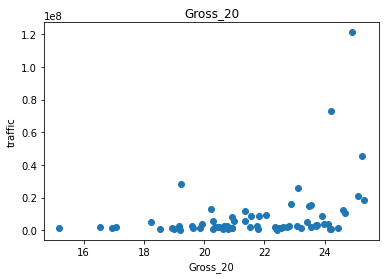

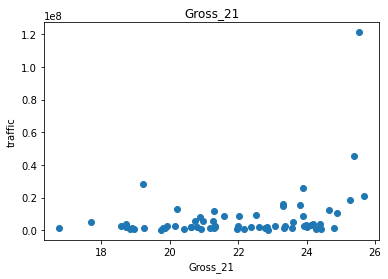

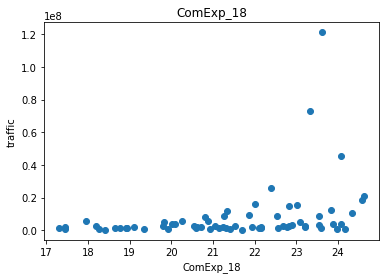

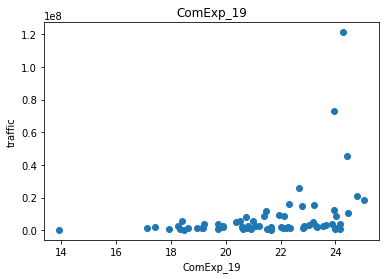

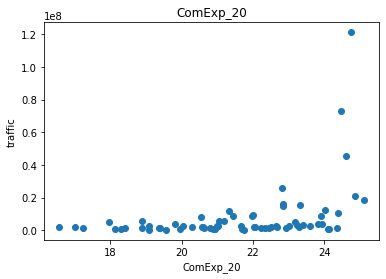

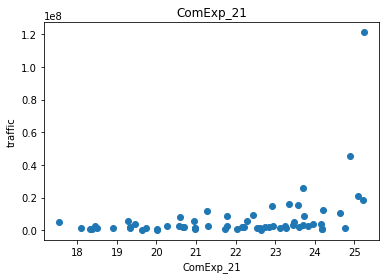

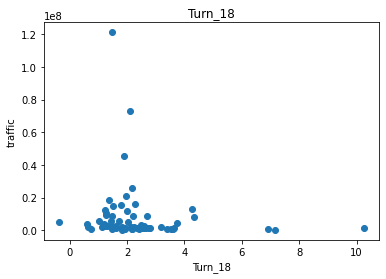

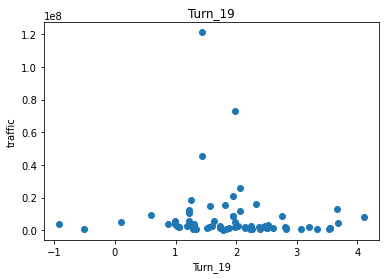

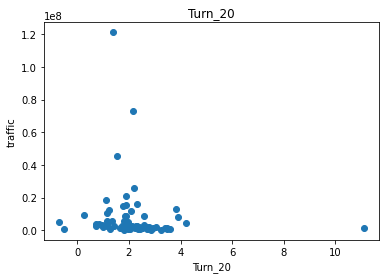

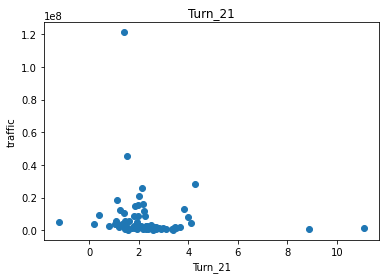

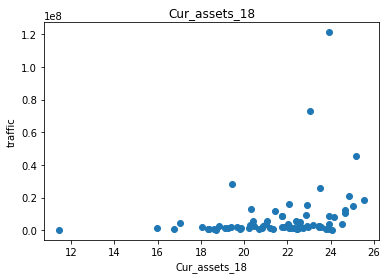

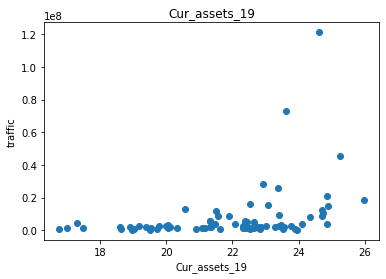

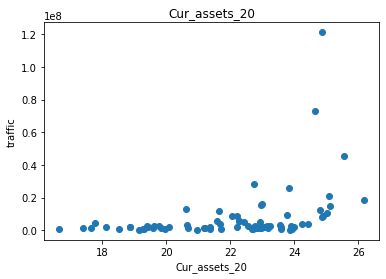

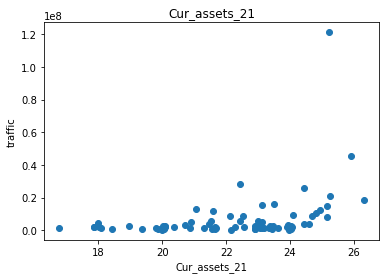

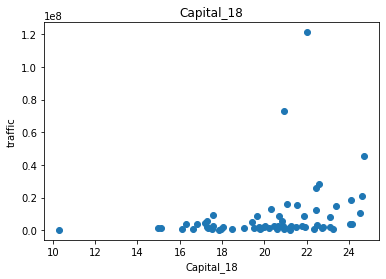

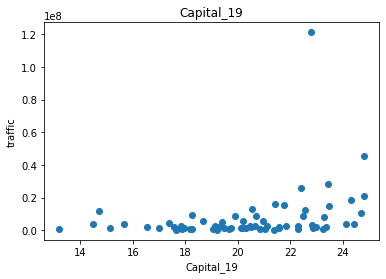

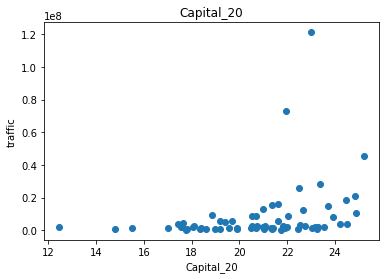

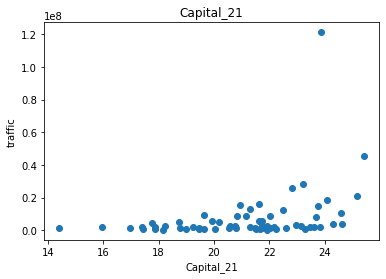

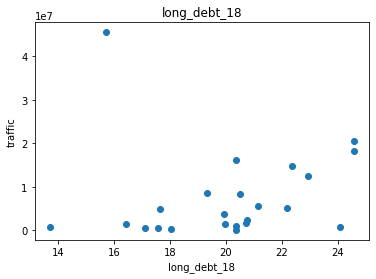

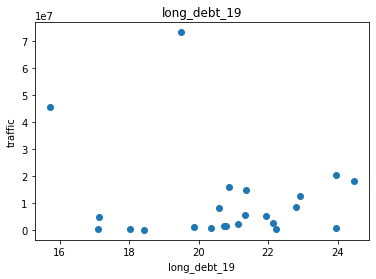

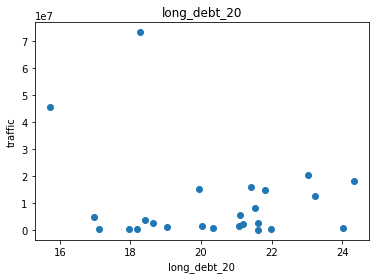

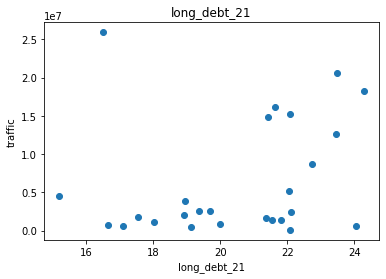

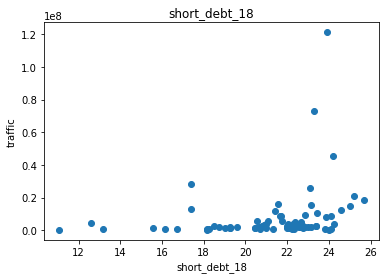

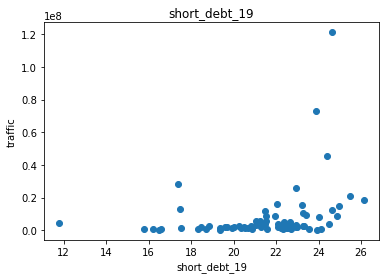

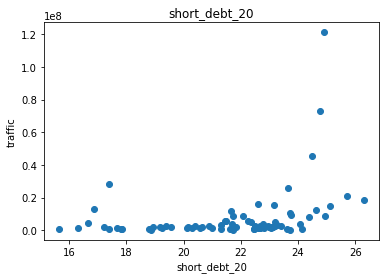

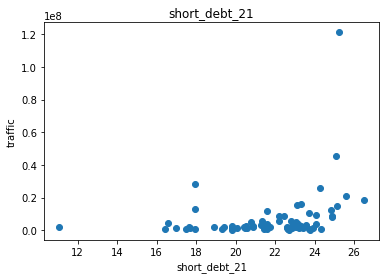

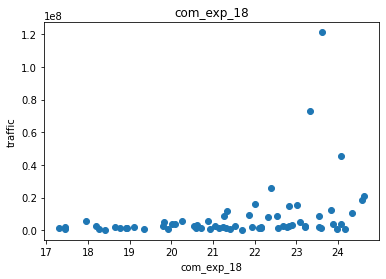

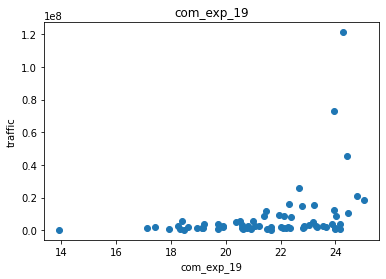

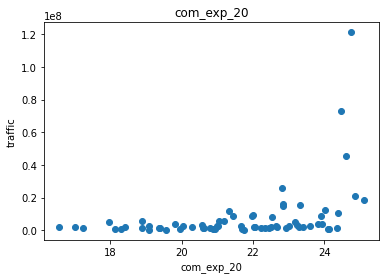

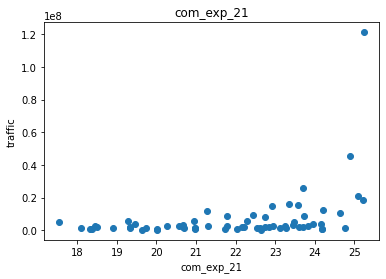

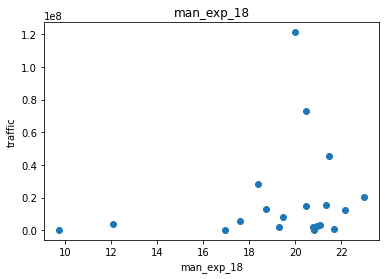

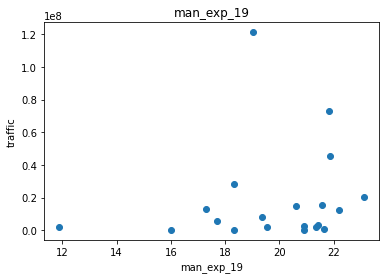

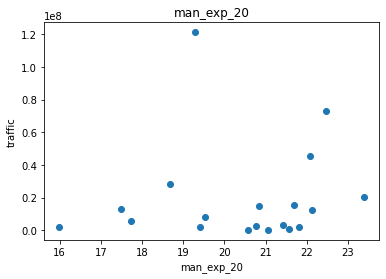

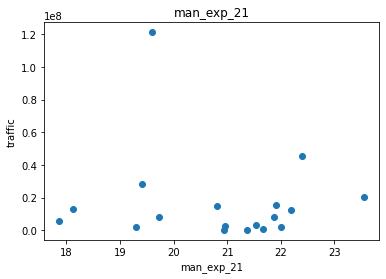

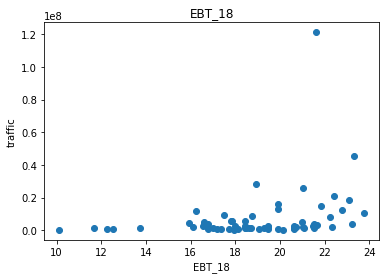

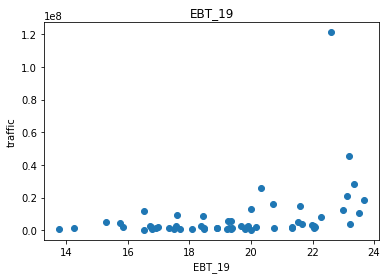

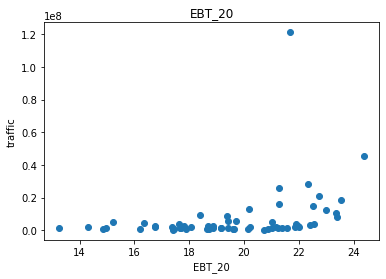

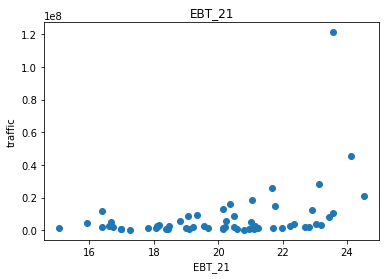

In [26]:
for i in range(len(train.columns[13::])):
    f, ax = plt.subplots()
    plt.scatter(np.log(train.dropna().iloc[:,i+13]),(train.traffic.dropna()))
    ax.set_title(train.columns[i+13])
    plt.xlabel(train.columns[i+13])
    plt.ylabel('traffic')

In [27]:
train.columns

Index(['FMCG', 'is_auto', 'is_house', 'is_health', 'is_books', 'is_beauty',
       'is_cloth', 'is_office', 'is_gifts', 'is_sport', 'is_child', 'is_uni',
       'is_tech', 'esales_20', 'delta_esales_20', 'orders', 'delta_orders',
       'av_price', 'delta_av_price', 'traffic', 'INT_18', 'INT_19', 'INT_20',
       'INT_21', 'FA_18', 'FA_19', 'FA_20', 'FA_21', 'Stocks_18', 'Stocks_19',
       'Stocks_20', 'Stocks_21', 'NA_18', 'NA_19', 'NA_20', 'NA_21',
       'Assets_18', 'Assets_19', 'Assets_20', 'Assets_21', 'AdCap_18',
       'AdCap_19', 'AdCap_20', 'AdCap_21', 'Rev_18', 'Rev_19', 'Rev_20',
       'Rev_21', 'CoS_18', 'CoS_19', 'CoS_20', 'CoS_21', 'Gross_18',
       'Gross_19', 'Gross_20', 'Gross_21', 'ComExp_18', 'ComExp_19',
       'ComExp_20', 'ComExp_21', 'Turn_18', 'Turn_19', 'Turn_20', 'Turn_21',
       'Cur_assets_18', 'Cur_assets_19', 'Cur_assets_20', 'Cur_assets_21',
       'Capital_18', 'Capital_19', 'Capital_20', 'Capital_21', 'long_debt_18',
       'long_debt_19', 'long_de

In [28]:
train['ROA_20'] = train['EBT_20'] / train['Assets_20']

In [29]:
train['ROA_20'].describe()

count    89.000000
mean      0.341411
std       2.492860
min      -1.073508
25%       0.007972
50%       0.058459
75%       0.149498
max      23.229278
Name: ROA_20, dtype: float64

<AxesSubplot:ylabel='ROA_20'>

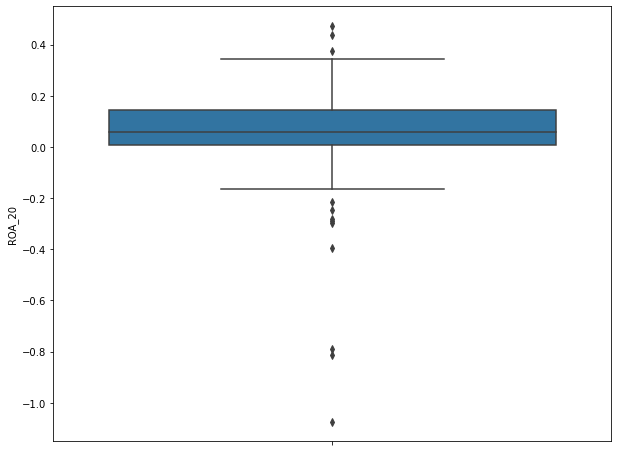

In [30]:
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(y=train['ROA_20'][train['ROA_20'] <3])

In [31]:
train[train['ROA_20'] > 20]

,FMCG,is_auto,is_house,is_health,is_books,is_beauty,is_cloth,is_office,is_gifts,is_sport,...,com_exp_21,man_exp_18,man_exp_19,man_exp_20,man_exp_21,EBT_18,EBT_19,EBT_20,EBT_21,ROA_20
ИНН,,,,,,,,,,,,,,,,,,,,,
5.027213e+09,0,1,0,0,0,0,0,0,0,0,...,7.479721e+09,283679000.0,255651000.0,302967000.0,367593000.0,4.620460e+09,4.702213e+09,1.469301e+10,1.521229e+10,23.229278


In [32]:
model = smf.ols('(traffic) ~ np.log(esales_20) + (Gross_20/CoS_20)',data=train[(train['Gross_20']!=0) & (train['CoS_20']!=0)].dropna()).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                traffic   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     26.97
Date:                Thu, 12 May 2022   Prob (F-statistic):           2.16e-06
Time:                        10:50:14   Log-Likelihood:                -1220.1
No. Observations:                  68   AIC:                             2444.
Df Residuals:                      66   BIC:                             2449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.925e-14   5.88e-1

C:\Users\demen\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [33]:
train['LR_cov_20'] = (train['Capital_20'] + train['long_debt_20']) / train['Assets_20']

In [107]:
train['LR_cov_18'] = (train['Capital_18'] + train['long_debt_18']) / train['Assets_18']

In [34]:
train['LR_cov_20'].describe()

count    89.000000
mean      0.937479
std       4.404051
min      -1.090570
25%       0.123796
50%       0.273091
75%       0.583263
max      38.673456
Name: LR_cov_20, dtype: float64

<AxesSubplot:ylabel='LR_cov_20'>

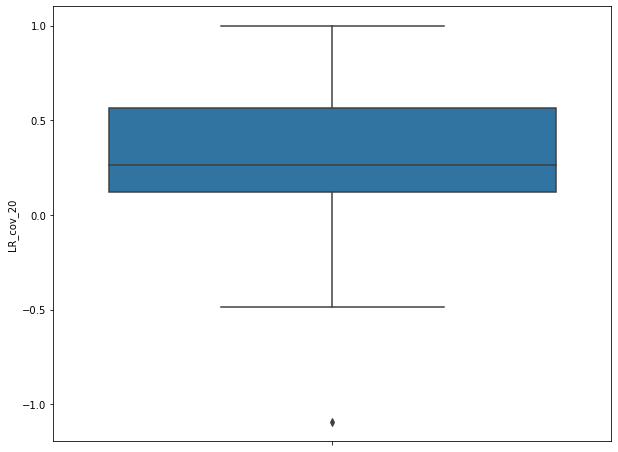

In [47]:
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(y=train['LR_cov_20'][train['LR_cov_20'] <15])

In [36]:
train['LR_cov_20'].isna().sum()

1

In [37]:
train['ROA_20'].isna().sum()

1

In [38]:
train['abs_liq_20'] = train['Cur_assets_20'] / train['short_debt_20']

In [105]:
train['abs_liq_18'] = train['Cur_assets_18'] / train['short_debt_18']

In [39]:
train['abs_liq_20'].describe()

count     89.000000
mean       4.613267
std       22.473508
min        0.319943
25%        1.004326
50%        1.226156
75%        1.720258
max      209.182545
Name: abs_liq_20, dtype: float64

In [40]:
train[train['abs_liq_20'] == 0]['abs_liq_20'].sum()

0.0

In [41]:
train['abs_liq_20'].sample(10)

ИНН
7.840020e+09    4.079927
3.305052e+09    1.197159
7.802349e+09    1.323849
7.732122e+09    1.055066
6.367651e+09    2.463673
7.725694e+09    1.215378
7.709770e+09    0.773628
7.713712e+09    1.056221
7.725792e+09    1.273875
7.734443e+09    1.439456
Name: abs_liq_20, dtype: float64

In [42]:
train['delta_cur_assets'] = (train['Cur_assets_20'] - train['Cur_assets_18']) / train['Cur_assets_18']

In [43]:
model = smf.ols('np.log(delta_cur_assets) ~ np.log(abs_liq_20) + np.log(ROA_20) + np.log(LR_cov_20) + np.power(esales_20,-1)',data=train[(train['Cur_assets_18']!=0) & (train['Cur_assets_19']!=0)& (train['Cur_assets_20']!=0)& (train['delta_cur_assets']<1200)].dropna()).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     np.log(delta_cur_assets)   R-squared:                       0.301
Model:                                  OLS   Adj. R-squared:                  0.231
Method:                       Least Squares   F-statistic:                     4.299
Date:                      Thu, 12 May 2022   Prob (F-statistic):            0.00550
Time:                              10:50:15   Log-Likelihood:                -62.243
No. Observations:                        45   AIC:                             134.5
Df Residuals:                            40   BIC:                             143.5
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='delta_cur_assets', ylabel='esales_20'>

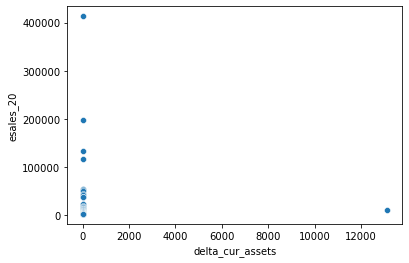

In [71]:
sns.scatterplot(x='delta_cur_assets', y='esales_20', data = train[(train['Stocks_20']!=0)&(train['abs_liq_20']<20)&(train['ROA_20']<20)&(train['LR_cov_20']<20)].dropna())

In [ ]:
train_1['delta_stocks'] = train_1['Stocks_20'] - train_1['Stocks_18']

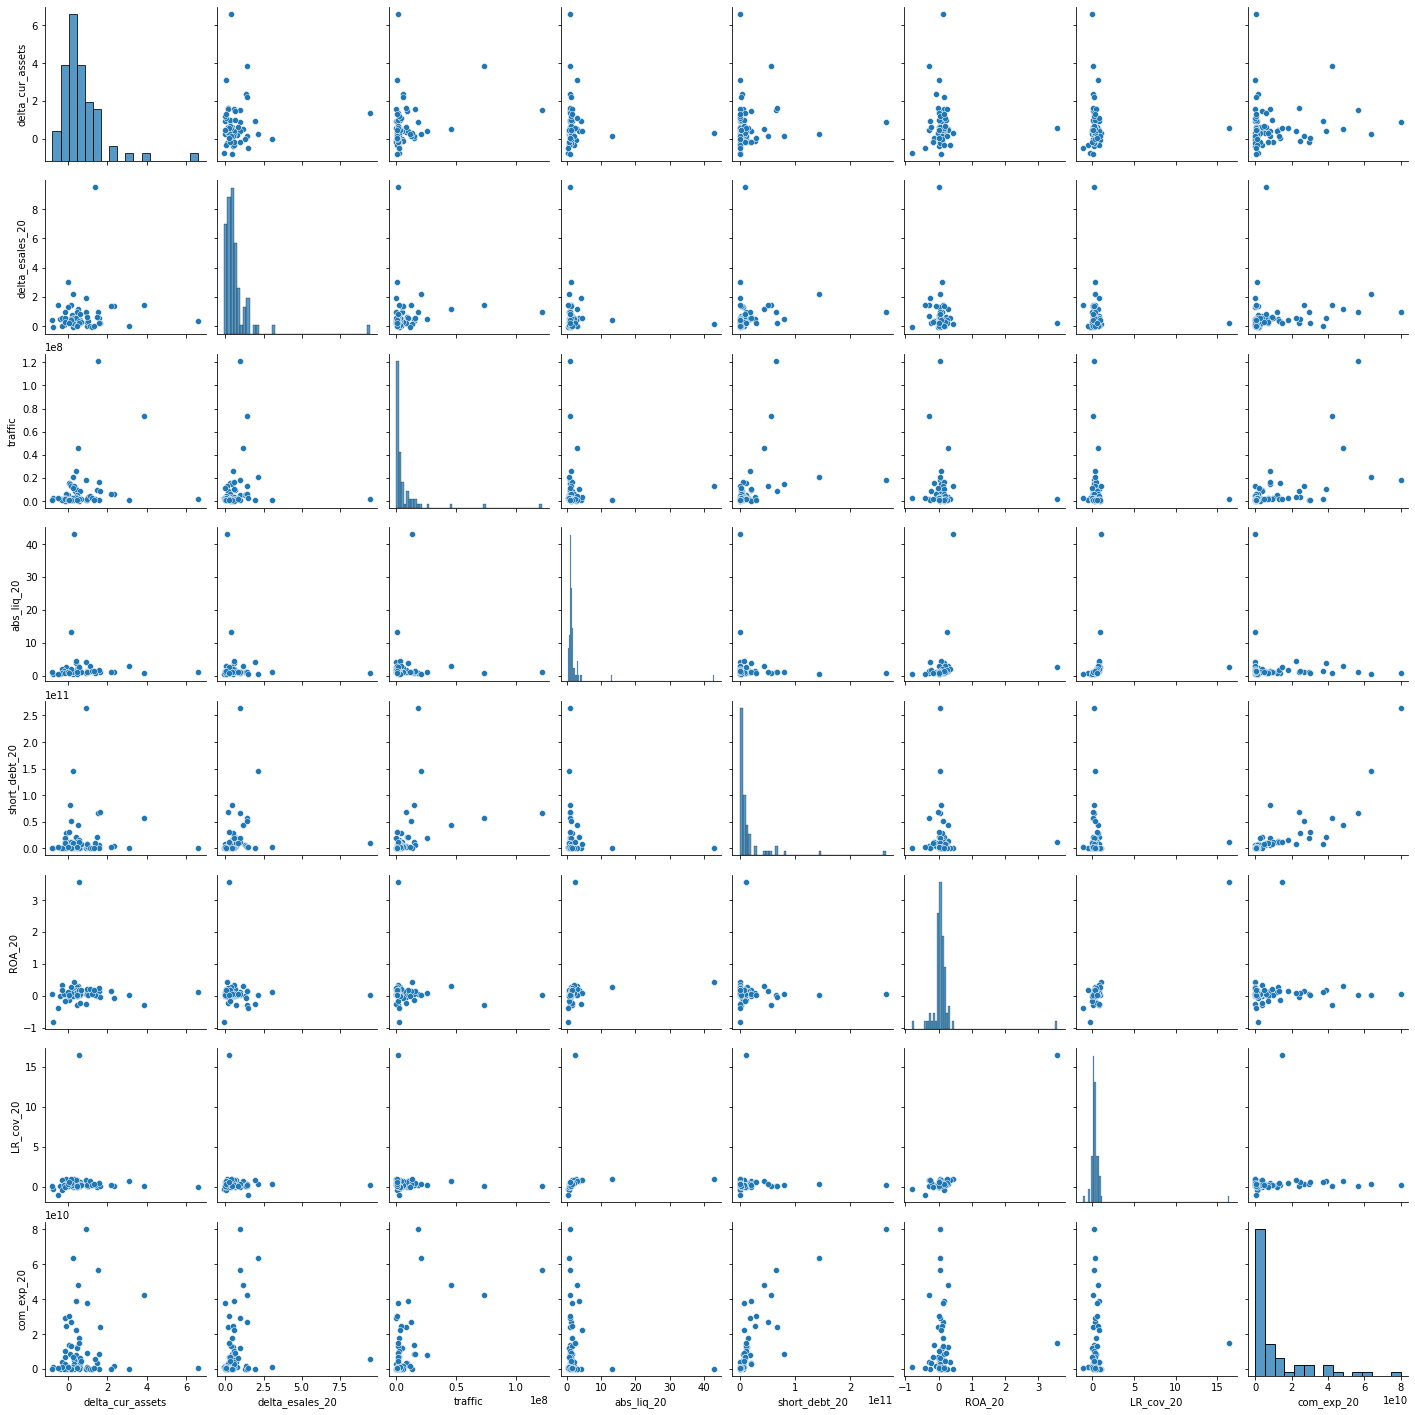

In [128]:
train_1 = train[(train['Cur_assets_18']!=0) & (train['Cur_assets_19']!=0)& (train['Cur_assets_20']!=0)].dropna()
sns.pairplot((train_1[['delta_cur_assets', 'delta_esales_20', 'traffic', 'abs_liq_20', 'short_debt_20', 'ROA_20', 'LR_cov_20','com_exp_20']][(train_1['delta_cur_assets']<25)&(train_1['ROA_20']<20)]))
    

In [127]:
train_1[train_1['LR_cov_20'] > 20]

,FMCG,is_auto,is_house,is_health,is_books,is_beauty,is_cloth,is_office,is_gifts,is_sport,...,EBT_18,EBT_19,EBT_20,EBT_21,ROA_20,LR_cov_20,abs_liq_20,delta_cur_assets,abs_liq_18,LR_cov_18
ИНН,,,,,,,,,,,,,,,,,,,,,
5.027213e+09,0,1,0,0,0,0,0,0,0,0,...,4.620460e+09,4.702213e+09,1.469301e+10,1.521229e+10,23.229278,38.673456,1.571931,0.99932,1.356692,18.28899


In [114]:
train_1.columns


Index(['FMCG', 'is_auto', 'is_house', 'is_health', 'is_books', 'is_beauty',
       'is_cloth', 'is_office', 'is_gifts', 'is_sport', 'is_child', 'is_uni',
       'is_tech', 'esales_20', 'delta_esales_20', 'orders', 'delta_orders',
       'av_price', 'delta_av_price', 'traffic', 'INT_18', 'INT_19', 'INT_20',
       'INT_21', 'FA_18', 'FA_19', 'FA_20', 'FA_21', 'Stocks_18', 'Stocks_19',
       'Stocks_20', 'Stocks_21', 'NA_18', 'NA_19', 'NA_20', 'NA_21',
       'Assets_18', 'Assets_19', 'Assets_20', 'Assets_21', 'AdCap_18',
       'AdCap_19', 'AdCap_20', 'AdCap_21', 'Rev_18', 'Rev_19', 'Rev_20',
       'Rev_21', 'CoS_18', 'CoS_19', 'CoS_20', 'CoS_21', 'Gross_18',
       'Gross_19', 'Gross_20', 'Gross_21', 'ComExp_18', 'ComExp_19',
       'ComExp_20', 'ComExp_21', 'Turn_18', 'Turn_19', 'Turn_20', 'Turn_21',
       'Cur_assets_18', 'Cur_assets_19', 'Cur_assets_20', 'Cur_assets_21',
       'Capital_18', 'Capital_19', 'Capital_20', 'Capital_21', 'long_debt_18',
       'long_debt_19', 'long_de

In [191]:
model = smf.ols('np.log(Stocks_20-Stocks_18) ~ np.log(traffic)',
                data=train[(train['Stocks_20']!=0)&(train['Stocks_18']!=0)&(train['com_exp_20']!=0)].dropna()).fit()

print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     np.log(Stocks_20 - Stocks_18)   R-squared:                       0.359
Model:                                       OLS   Adj. R-squared:                  0.344
Method:                            Least Squares   F-statistic:                     24.11
Date:                           Thu, 12 May 2022   Prob (F-statistic):           1.36e-05
Time:                                   23:19:30   Log-Likelihood:                -83.318
No. Observations:                             45   AIC:                             170.6
Df Residuals:                                 43   BIC:                             174.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [196]:
train['ln_dif_stocks'] = np.log(train['Stocks_20'] - train['Stocks_18'])
train['ln_traffic'] = np.log(train['traffic'])



C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


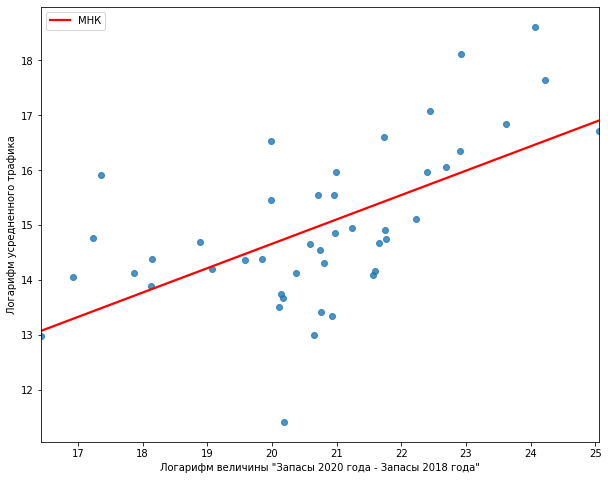

In [217]:
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='ln_dif_stocks', y='ln_traffic',data=train[(train['Stocks_20']!=0)&(train['Stocks_18']!=0)&(train['com_exp_20']!=0)].dropna(),ci=0,fit_reg=True,line_kws={'color':'red'})
plt.ylabel('Логарифм усредненного трафика')
plt.xlabel('Логарифм величины "Запасы 2020 года - Запасы 2018 года"')
plt.legend(['МНК'])
plt.savefig('Traffic')

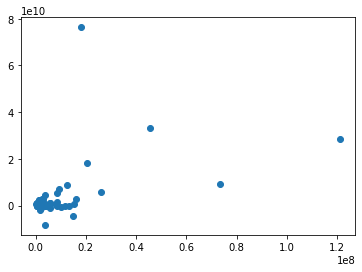

In [98]:
plt.scatter(x=(train['traffic'][(train['Stocks_20']!=0)&(train['Stocks_18']!=0)]),y=(train['Stocks_20'][(train['Stocks_20']!=0)&(train['Stocks_18']!=0)])-(train['Stocks_18'][(train['Stocks_20']!=0)&(train['Stocks_18']!=0)]))

In [147]:
from linearmodels import IV2SLS

In [154]:
train_stocks = train[(train['Stocks_20']!=0)&(train['Stocks_18']!=0)&(train['ComExp_20']!=0)].dropna()
train_stocks['diff_stocks'] = (train_stocks['Stocks_20'] - train['Stocks_18']) / train['Stocks_18']
train_stocks['const'] = 1

In [157]:
ivolsmod = IV2SLS(np.log(train_stocks['diff_stocks']), train_stocks[['ComExp_20','traffic']],None,None).fit()
print(ivolsmod)

                            OLS Estimation Summary                            
Dep. Variable:            diff_stocks   R-squared:                      0.1168
Estimator:                        OLS   Adj. R-squared:                 0.0757
No. Observations:                  45   F-statistic:                    4.5524
Date:                Thu, May 12 2022   P-value (F-stat)                0.1027
Time:                        22:06:52   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
ComExp_20  -2.544e-11  1.208e-11    -2.1054     0.0353  -4.913e-11  -1.757e-12
traffic     1.335e-08  7.436e-09     1.7957     0.07

C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\linearmodels\shared\exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [181]:
variance_inflation_factor(train[['Assets_19','Assets_20']].dropna().values,np.array([1]))

64.8146346524641

In [190]:
X = add_constant(train_1[['delta_cur_assets', 'delta_esales_20', 'traffic', 'abs_liq_20', 'short_debt_20', 'ROA_20', 'LR_cov_20','com_exp_20']][(train_1['delta_cur_assets']<25)&(train_1['ROA_20']<20)])
pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)

const               2.303849
delta_cur_assets    1.099675
delta_esales_20     1.028927
traffic             1.713224
abs_liq_20          1.068375
short_debt_20       3.096326
ROA_20              8.975207
LR_cov_20           8.822445
com_exp_20          4.069596
dtype: float64

In [189]:
X.shape[0]

64

In [7]:
import numpy as np

In [14]:
a = []
for i in np.arange(1,2022,4):
    a.append(i**2 + (i+1)**2)
b = []
for k in np.arange(3,2022,4):
    b.append(-(k**2) - (k+1)**2)

In [22]:
np.sum(a+b)

4090505